<a href="https://colab.research.google.com/github/sksamima5/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing the Libraries**

In [811]:
#Lets Import the essential modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#**Mount the drive and Import the Dataset** 

In [812]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [813]:
#Readind CSV file and load the data
bike_df = pd.read_csv('/content/drive/MyDrive/Capstone Project (Bike share prediction)/SeoulBikeData.csv', encoding = 'latin')

#**Let's Explore and Understand about the data** 

In [814]:
#Checking top first 5 rows of Data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [815]:
#Checking last 5 rows(tail) of Data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [816]:
#Checking the shape of Dataset with rows and columns 
print(f' The shape of dataset is {(bike_df.shape)} \n Total Rows are : {(bike_df.shape)[0]}\n Total Columns are : {(bike_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [817]:
#Checking deatils about the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [818]:
#Checking all the columns of dataset
print(f'All the columns in the dataset:')
bike_df.columns

All the columns in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [819]:
#Print all the unique values of Dataset
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [820]:
#checking the description of dataset
bike_df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#**Feature Description**

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY,  type : str*,  we need to convert into datetime format.


**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that,  type : int*


**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format,  type : int, we need to convert it into category data type.*


**Temperature(°C)**: *Temperature in Celsius,  type : Float*


**Humidity(%)**: *Humidity in the air in %,  type : int*


**Wind speed (m/s)** : *Speed of the wind in m/s,  type : Float*


**Visibility (10m)**: *Visibility in m,  type : int*


**Dew point temperature(°C)**: *Temperature at the beggining of the day,  type : Float*


**Solar Radiation (MJ/m2)**: *Sun contribution,  type : Float*


**Rainfall(mm)**: *Amount of raining in mm,  type : Float*


**Snowfall (cm)**: *Amount of snowing in cm,  type : Float*


**Seasons**: *Season of the year,  type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*


**Functioning Day**: *If the day is a Functioning Day or not, type : str*

#**Preprocessing the Dataset**

**Missing values**
* **The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**



In [821]:
#Checking the Null/Missing values
bike_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **As we can see above there are no missing values present in the data**

**Duplicate Value** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [822]:
#Checking the Duplicate values
bike_df.duplicated().sum()

0

* **As we can see above there are no Duplicates values present in the data**

#**Renaming some Columns name (For Modelling purpose)**
* **Since the variables having units with name, so renaming columns for better variable analysis**



In [823]:
#Renaming some columns name
bike_df = bike_df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                                    'Temperature(°C)':'Temperature',
                                    'Humidity(%)':'Humidity',
                                    'Wind speed (m/s)': 'Wind_speed',
                                    'Visibility (10m)':'Visibility',
                                    'Dew point temperature(°C)': 'Dew_point_temperature', 
                                    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                                    'Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall', 
                                    'Functioning Day':'Functioning_Day'})

#**Breaking Date Column**

* **Python read "Date" column as a object type so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.**


In [824]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')

bike_df['year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [825]:
#creating a new column 'weekdays_weekends' and drop column 'date', 'day', 'year'
bike_df['weekdays_weekends'] = bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df=bike_df.drop(columns = ['Date','day','year'],axis = 1 )

In [826]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekends
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


* **As we can see following above in the data**

 ***We convert the "date" column into 3 different column i.e "year","month","day".***

 ***The "year" column in our data set is basically contain the 2 unique years contains the details of from 2017 december to 2018 november so if we consider this is a one year then we don't need the "year" column so we decided to drop it***.

 ***The other "day" column, it contain the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

#**Let's check the Data type**

In [827]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekends      8760 non-null   int64  
dtypes: f

In [828]:
#Let's check the value counts for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [829]:
#Let's check the value counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [830]:
#Let's check the value counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [831]:
#Let's check the value counts for month categories
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [832]:
#Let's check the value counts for Hour categories
bike_df['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

# **Exploratory Data Analysis of the Data Set**

In [833]:
#Create a Numerical columns 
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'weekdays_weekends']

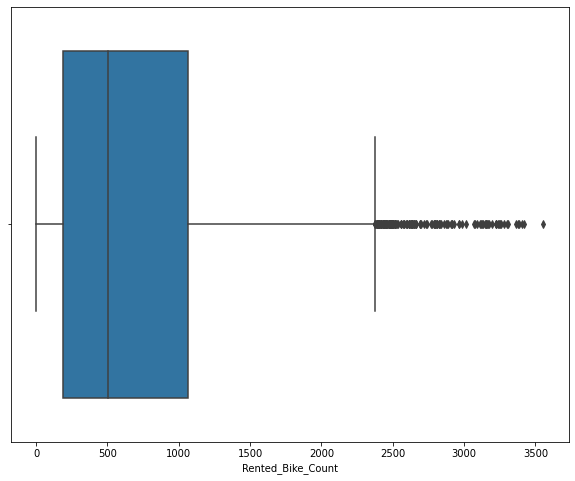

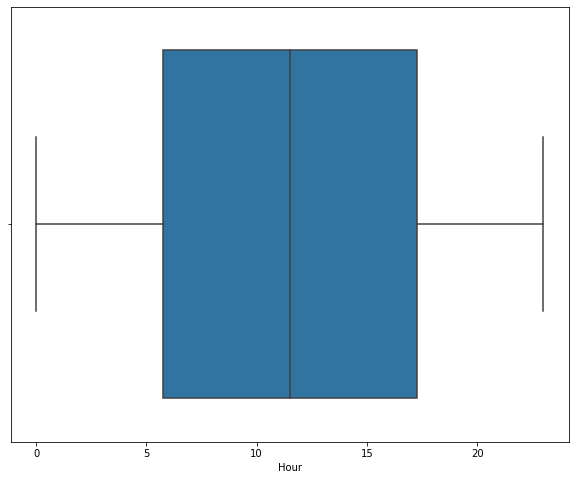

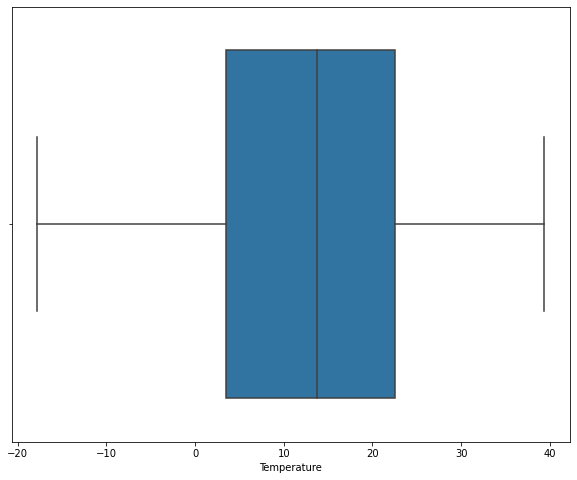

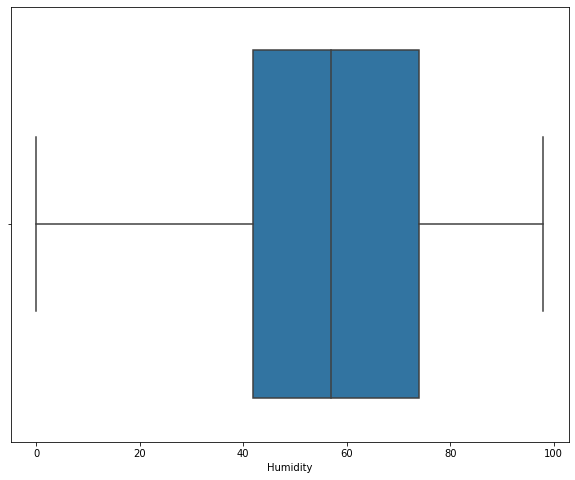

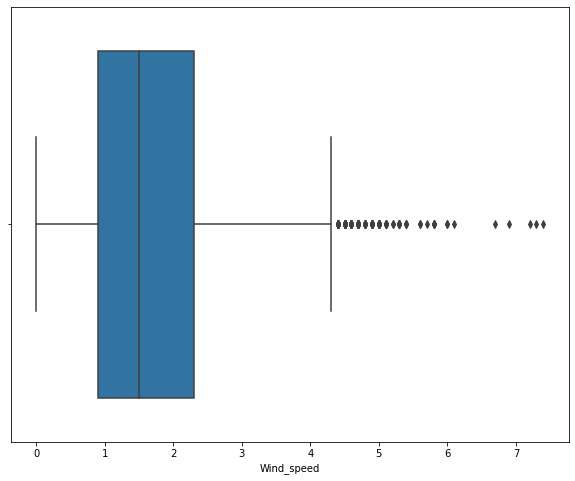

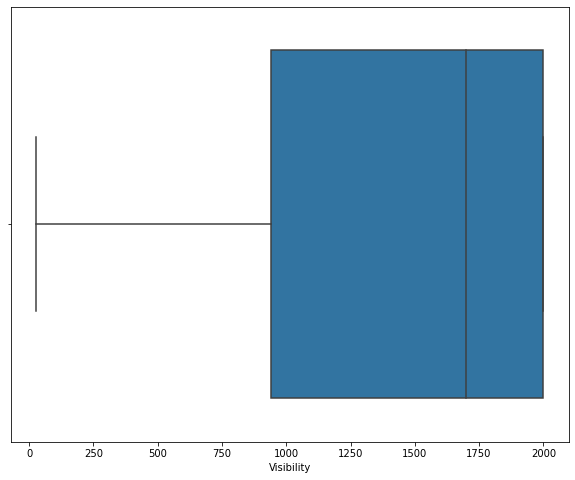

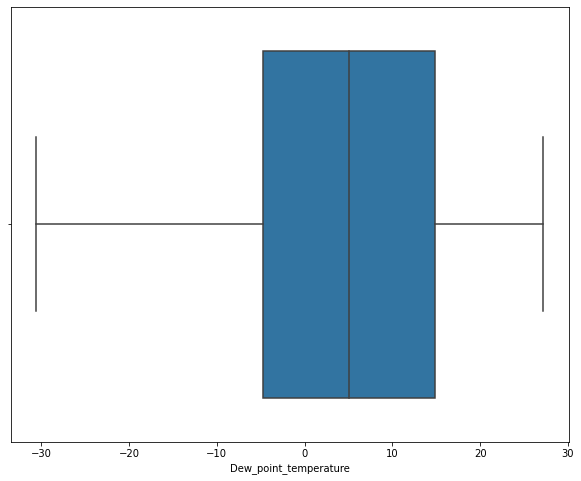

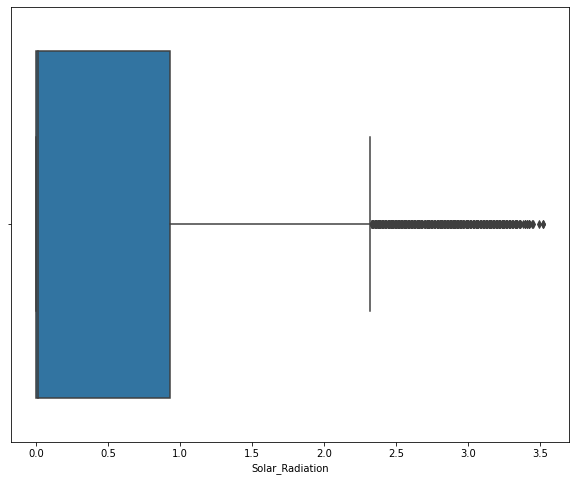

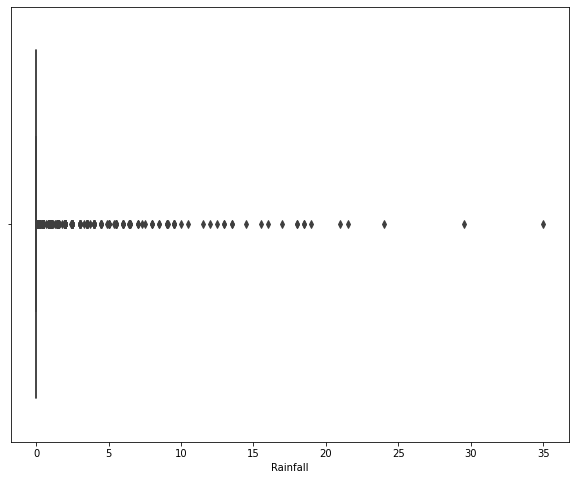

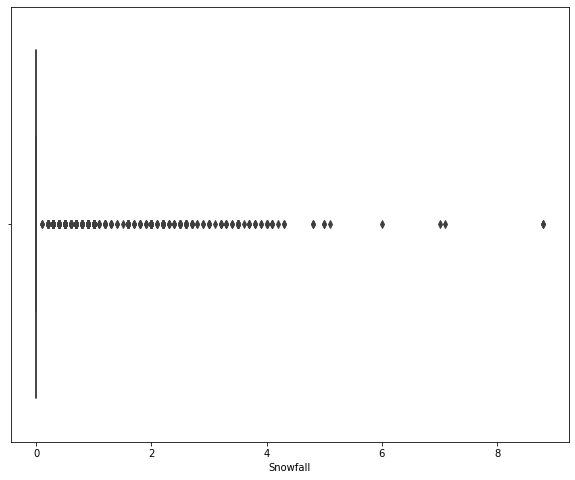

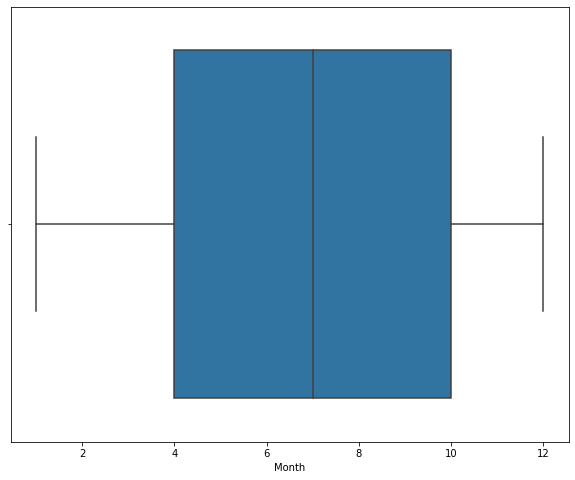

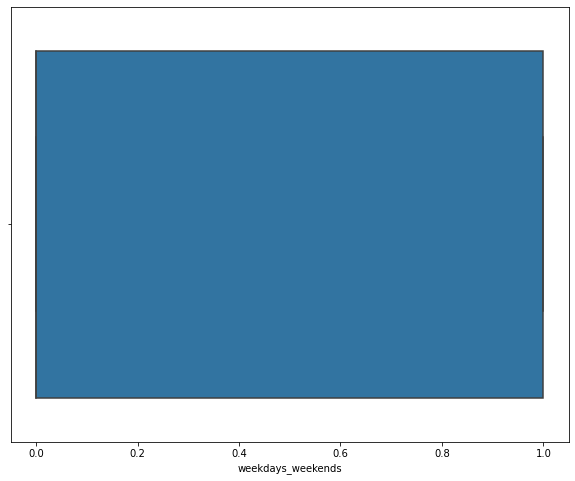

In [834]:
#Create a Boxplot for all the Numerical column to checking the outliers
for col in numeric_col:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

* **As "Hour","Month","weekdays_weekends" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data type.**

In [835]:
#Changing int64 column to category column
cols = ['Hour','Month','weekdays_weekends']
for col in cols:
  bike_df[col]= bike_df[col].astype('category')

In [836]:
#Lets check the data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays_weekends      8760 non-null   c

#**Let's plot barchart plot for each columns with respect to target variable to get insights**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour')]

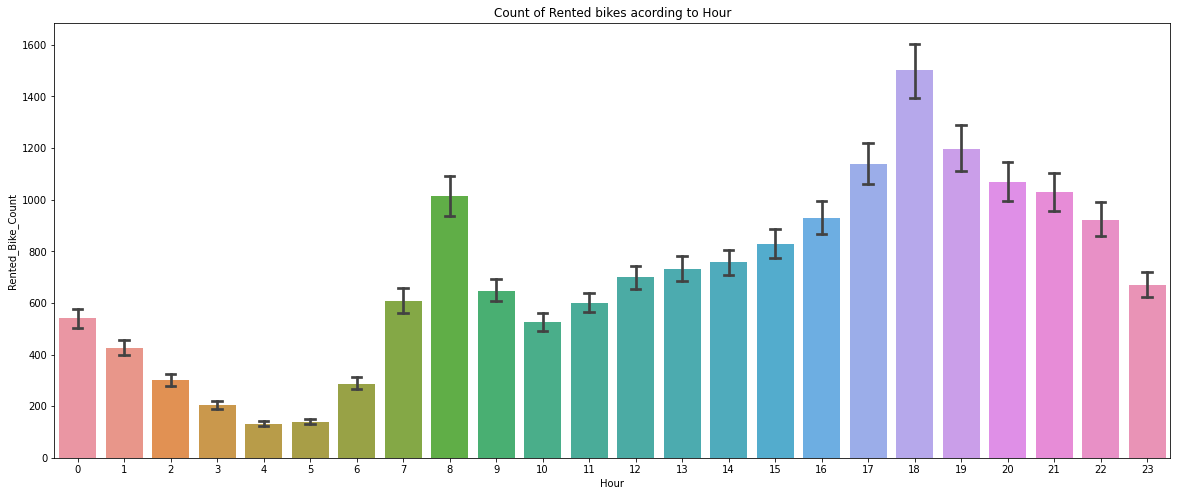

In [837]:
#analysis of Hour data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour')

##**Observation**
* **In the above plot which shows the use of rented bike according the hours.**

* **Generally people use rented bikes during their working hours from 7am to 9am and 5pm to 7pm.(Office and college going time could be the reason for this sudden peak)**

* **But on Holidays the case is different (Less Bike rentals happened).**
* **Again there is peak between 10 AM to 7 PM. may be its office or college leaving time for the above people.(Except Holiday).**   

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

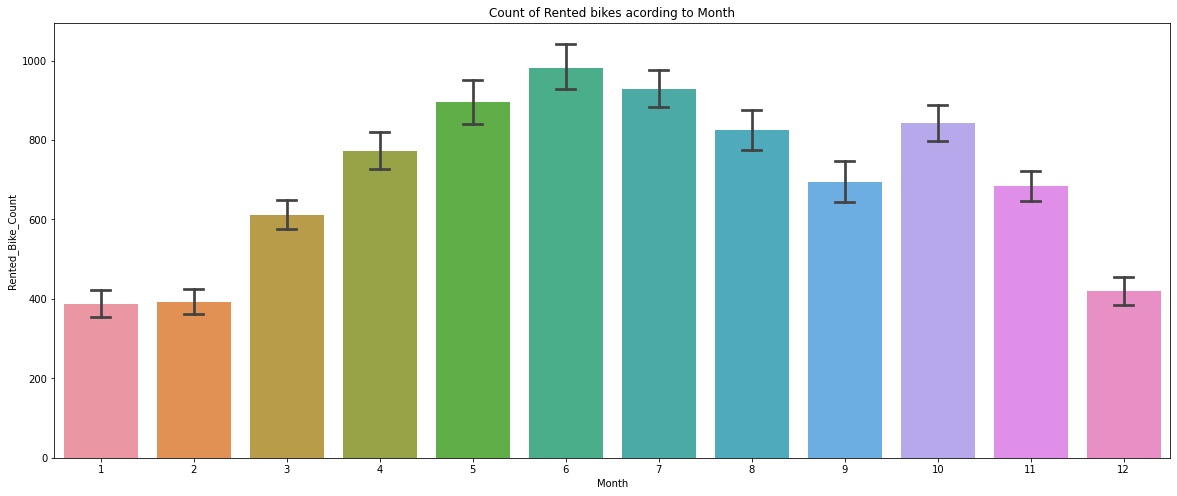

In [838]:
#analysis of Month data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df, x='Month', y='Rented_Bike_Count', capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

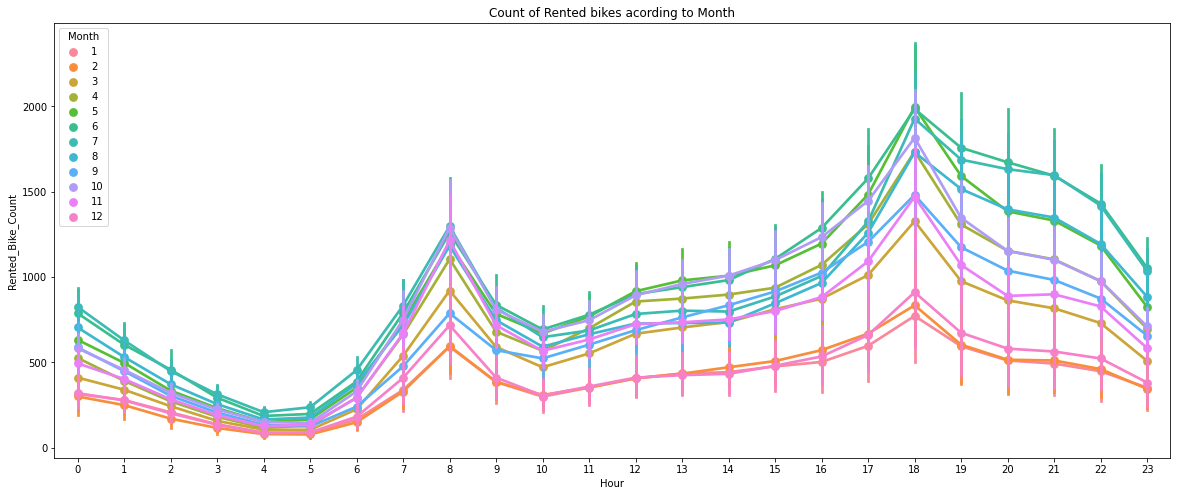

In [839]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Month',ax=ax)
ax.set(title='Count of Rented bikes acording to Month')

##**Observation**
* **From the above bar and point plot we can clearly say that from the month 5th to 10th the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

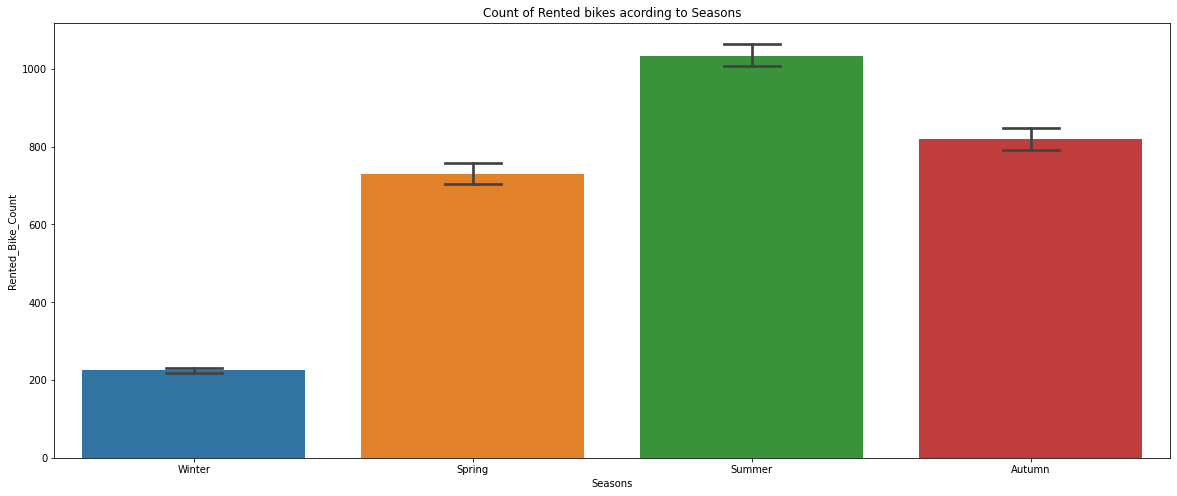

In [840]:
#analysis of Seasons data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Seasons', y='Rented_Bike_Count', capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

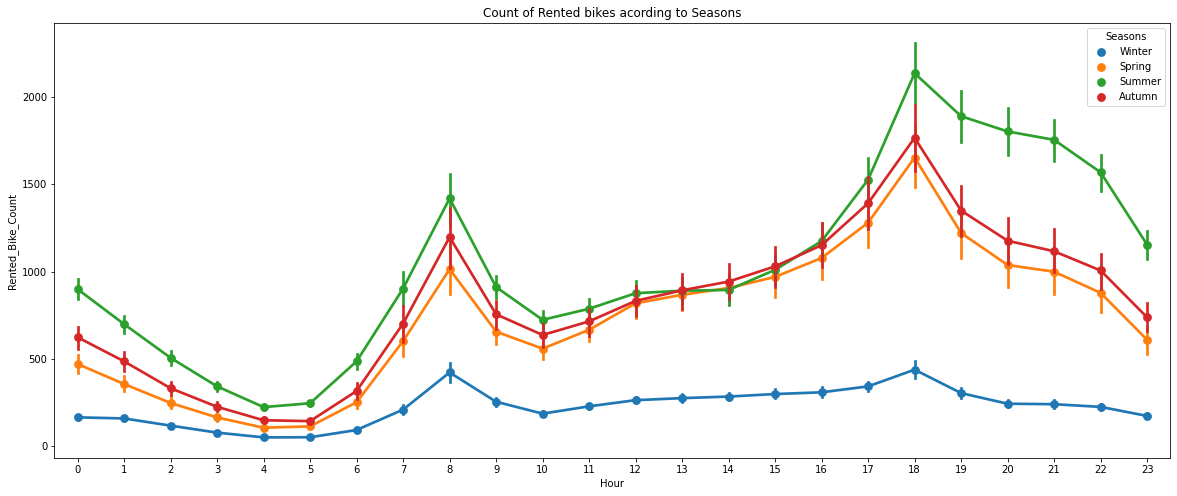

In [841]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons')

##**Observation**
* **In the above bar plot and point plot which shows the use of rented bikes in four different seasons, and it clearly shows that :**
* **In Summer, Autumn and Spring seasons the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.**
* **But In winter season the use of rented bike is very low because of snowfall.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holidays')]

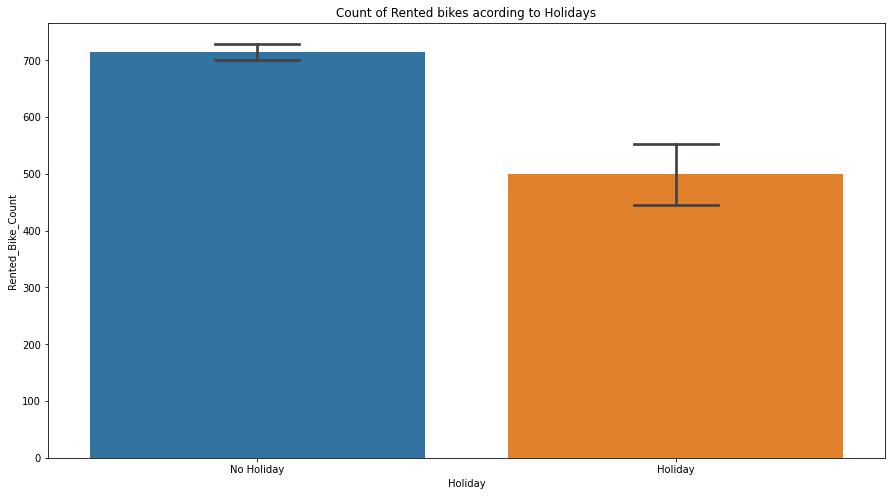

In [842]:
#analysis of Holiday data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to Holidays')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

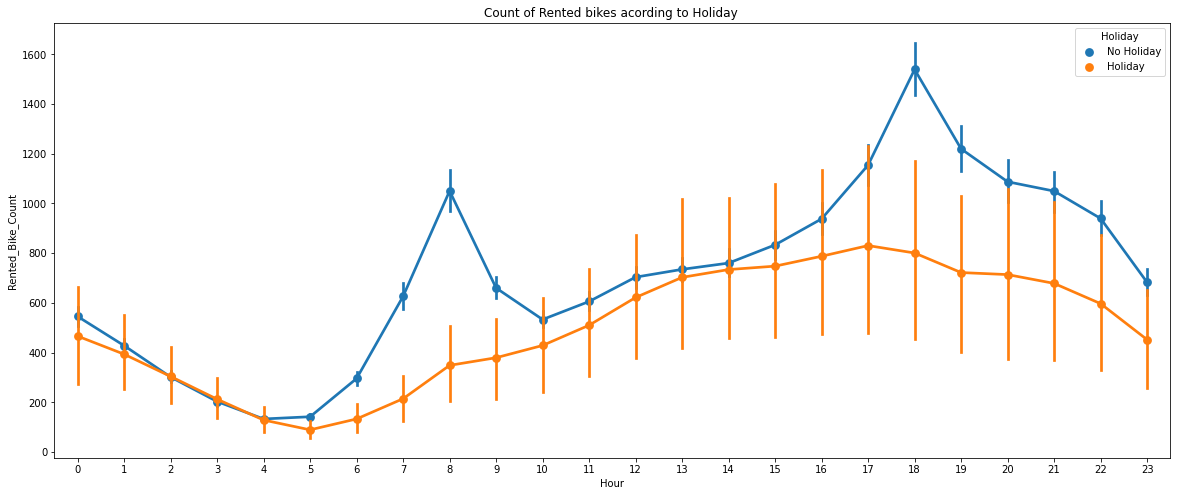

In [843]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##**Observation**
* **In the above bar plot and point plot shows that the use of rented bike in a holiday**
* **In holiday people uses the rented bikes Mostly from 2pm-8pm**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

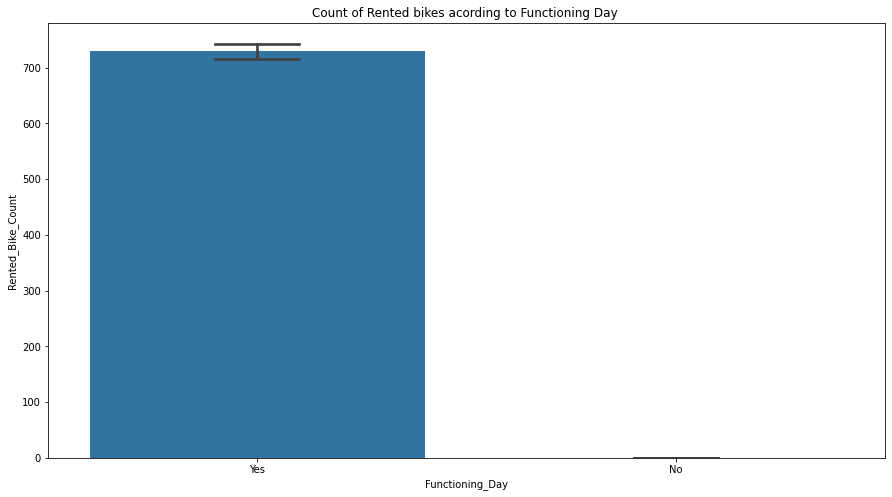

In [844]:
#anlysis of Functioning_day data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

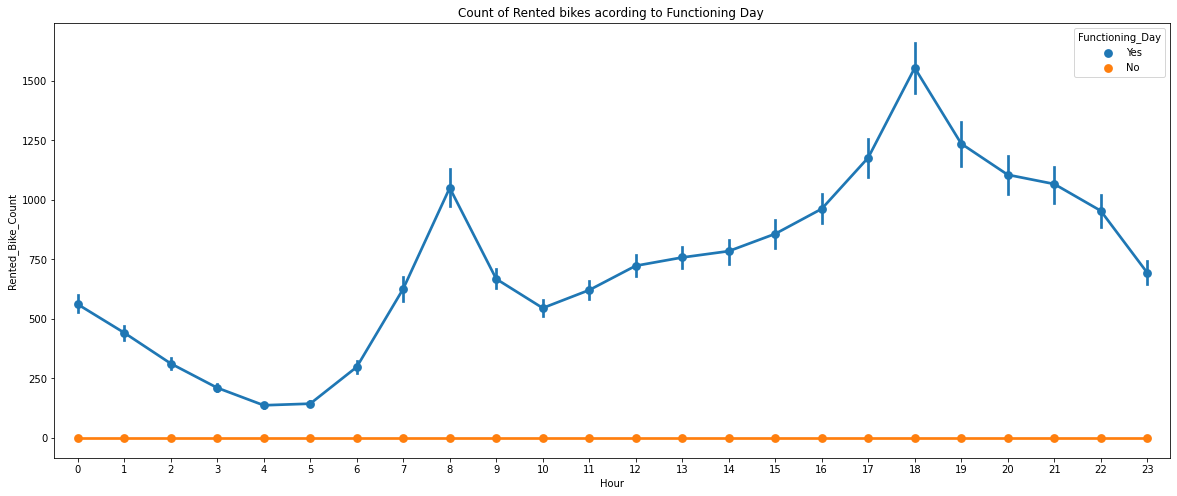

In [845]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##**Observation**
* **In the above bar plot and point plot which shows the use of rented bike in functioning days and non-functioning days**
* **We observe that Peoples don't use reneted bikes in non-functioning day.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekends')]

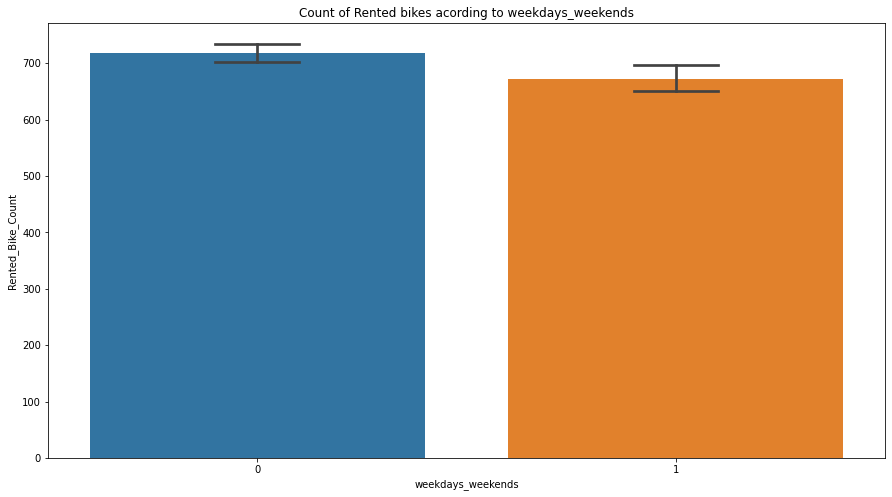

In [846]:
#analysis of weekdays_weekends data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='weekdays_weekends',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekends')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekends')]

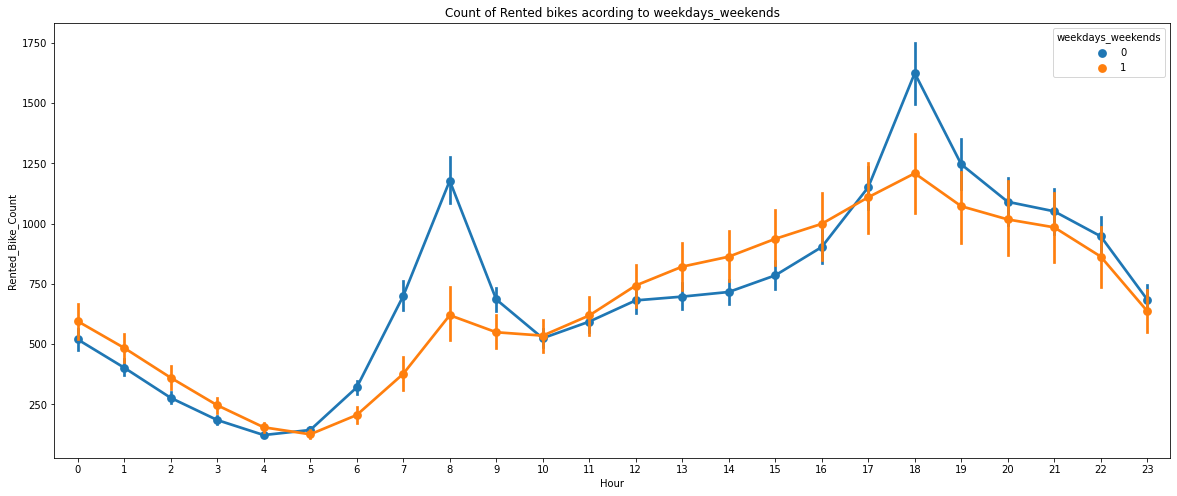

In [847]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekends',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekends')

##**Observations**
* **From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office or college.**
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it shows that the demand of rented bikes are very low specially in the morning hours but when the evening start from 4 pm to 8 pm the demand slightly increases.** 

#**Let's check the Distribution of all the Variables**


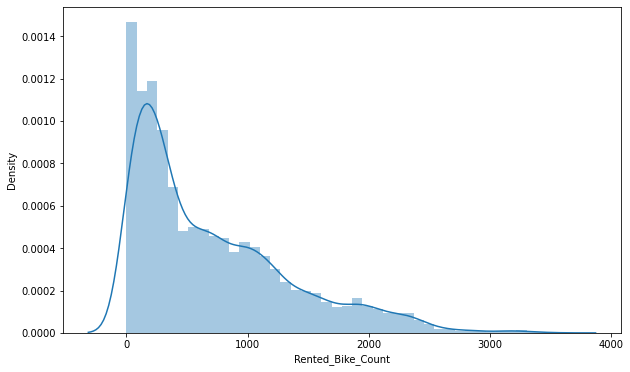

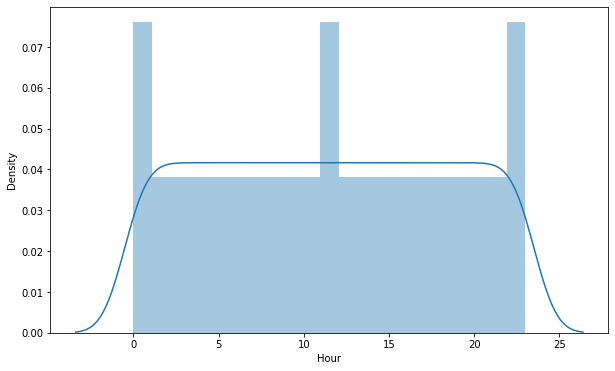

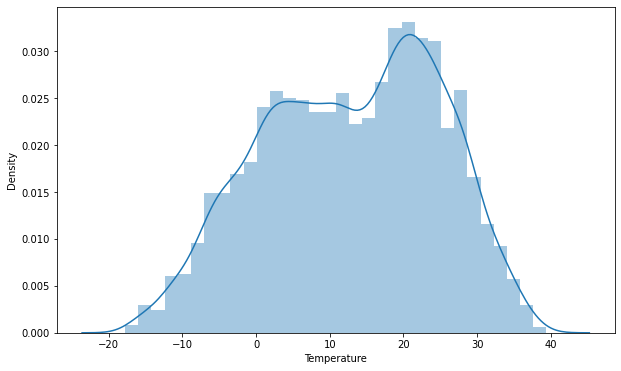

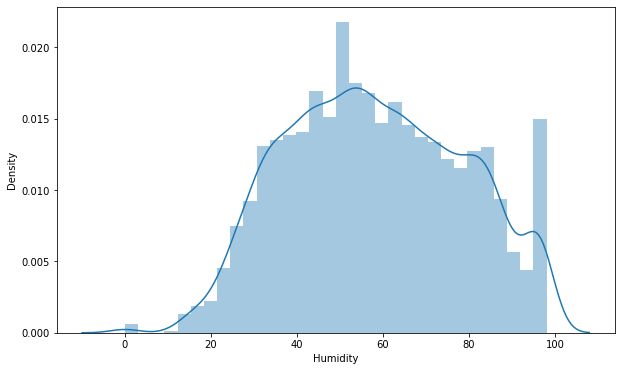

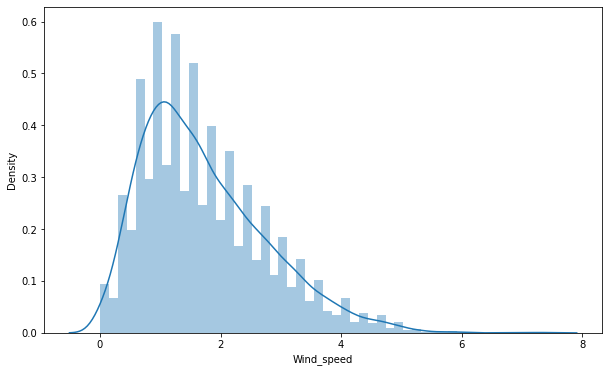

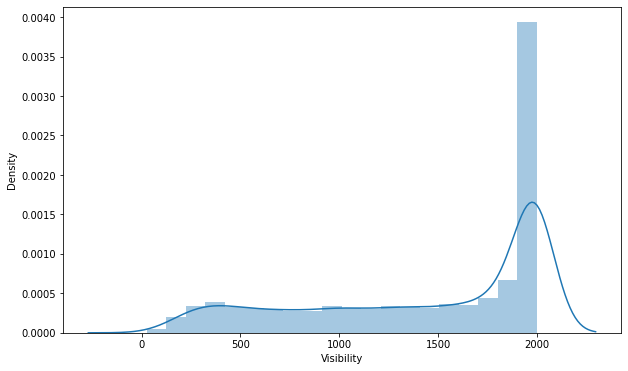

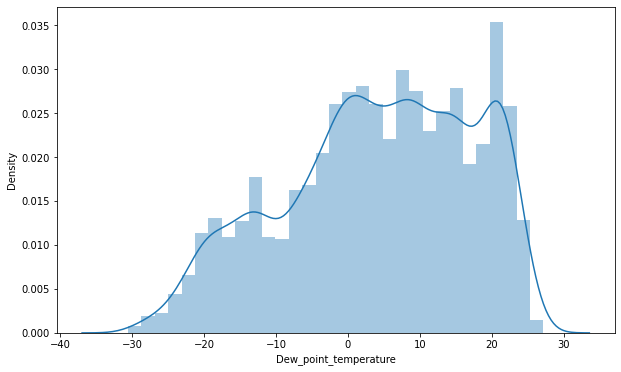

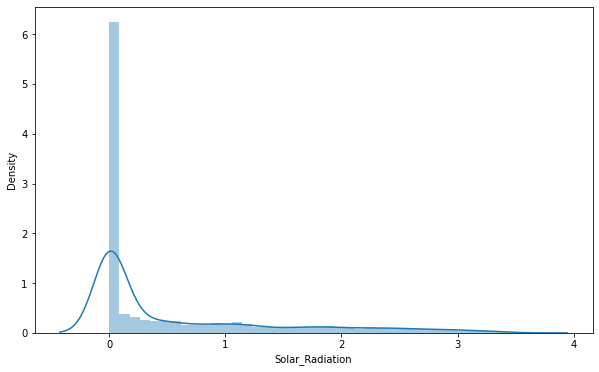

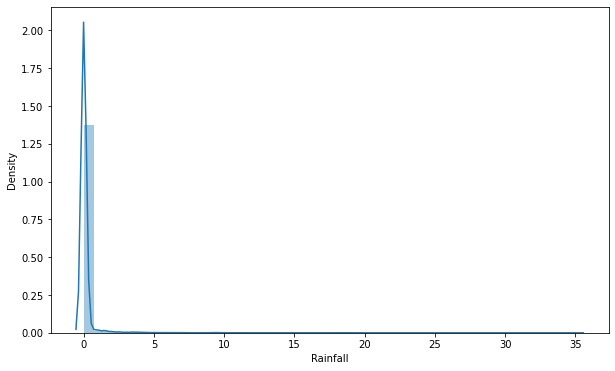

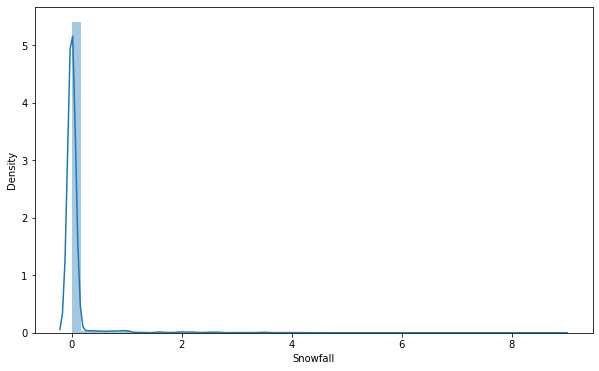

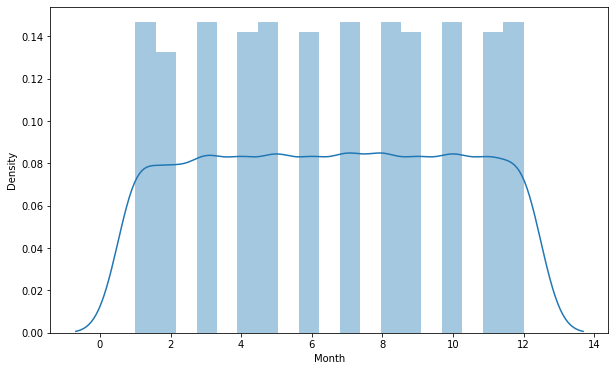

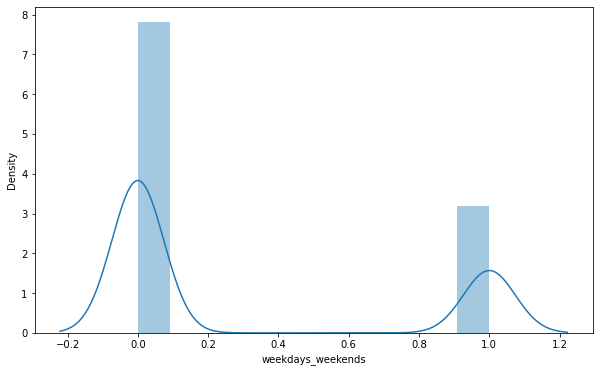

In [848]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_col:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#**Let's check the Relationship Between the Target and Independent variable**

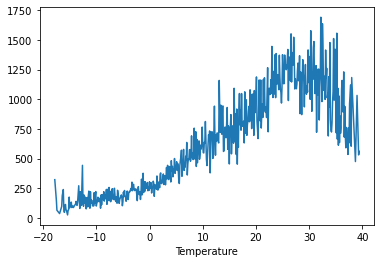

In [849]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

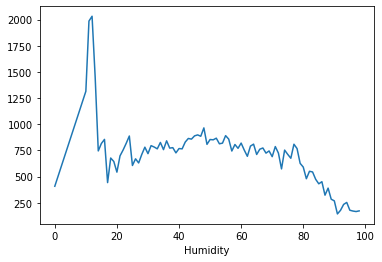

In [850]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Humidity"
bike_df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

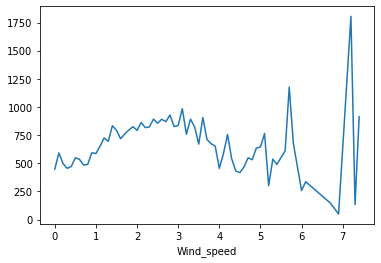

In [851]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

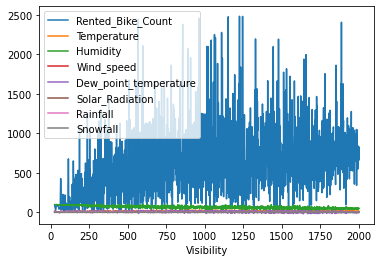

In [852]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Visibility"
bike_df.groupby('Visibility').mean(['Rented_Bike_Count']).plot()

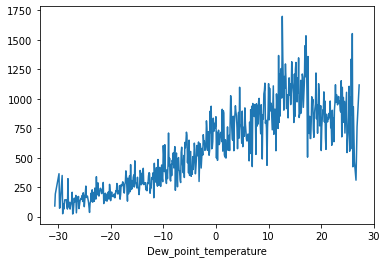

In [853]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

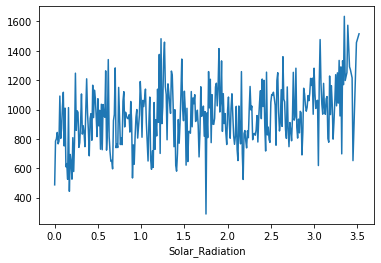

In [854]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

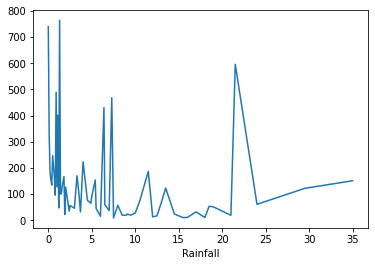

In [855]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

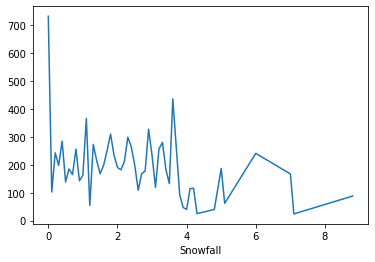

In [856]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

#**Regresion Plot**

In [857]:
#Create a Numerical columns 
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

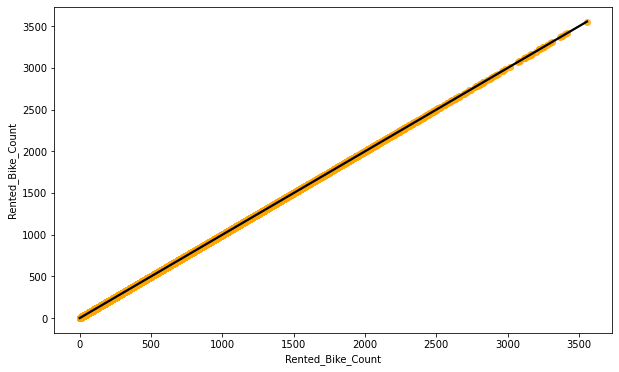

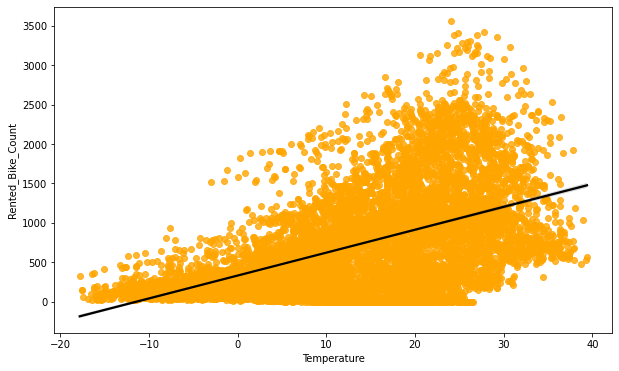

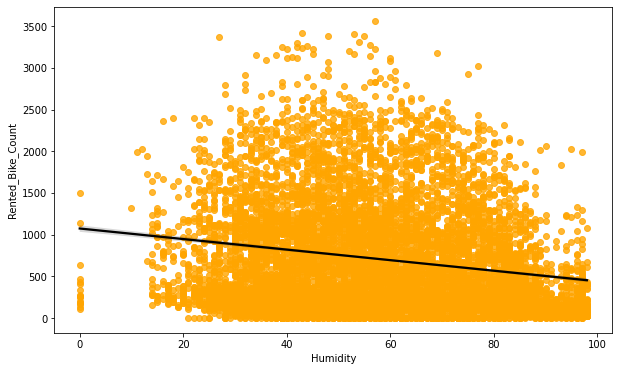

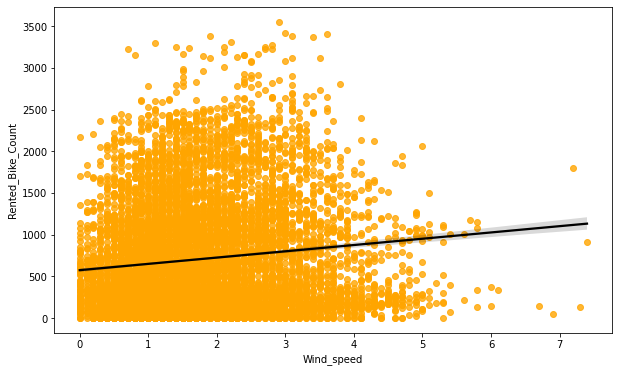

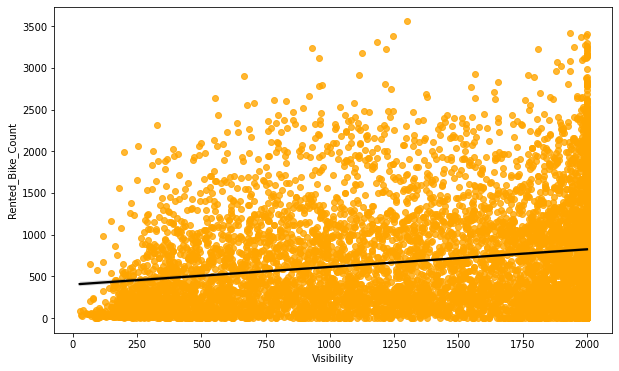

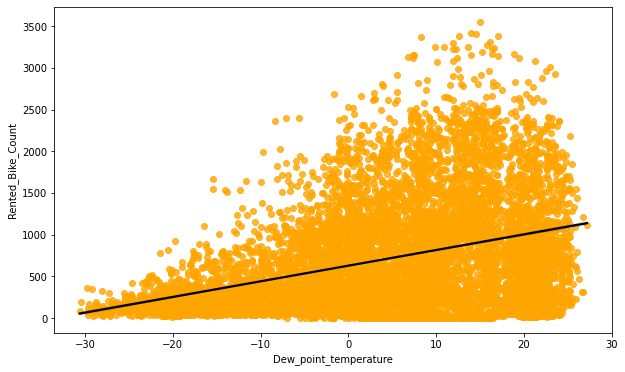

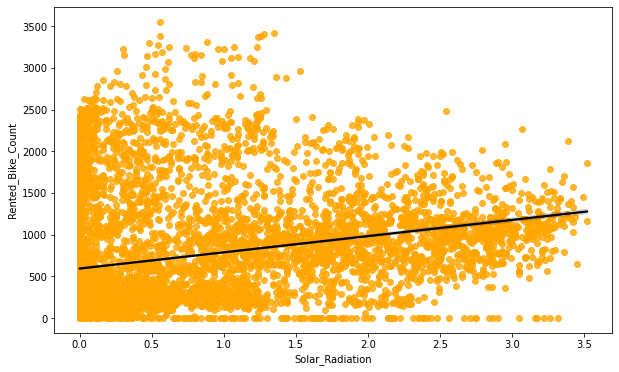

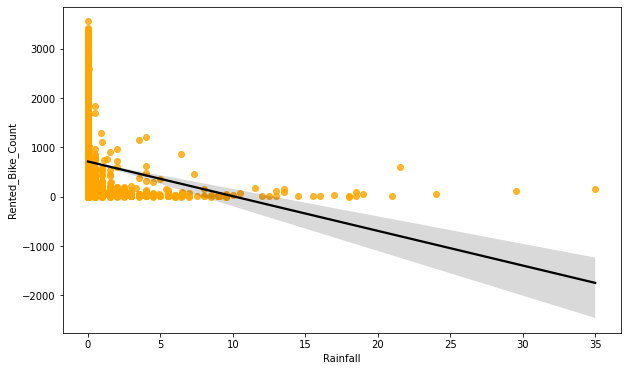

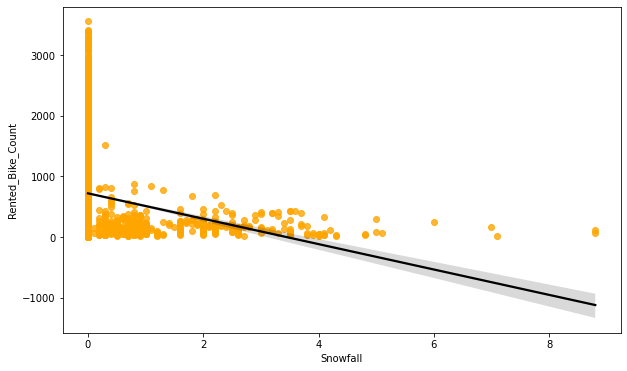

In [858]:
#printing the regression plot for all the numerical features
for col in numeric_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* **From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.**


* **which means the rented bike count increases with increase of these features.**
* **'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.**

#**Normalise Rented_Bike_Count data column (Dependent Variable)**

* **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**

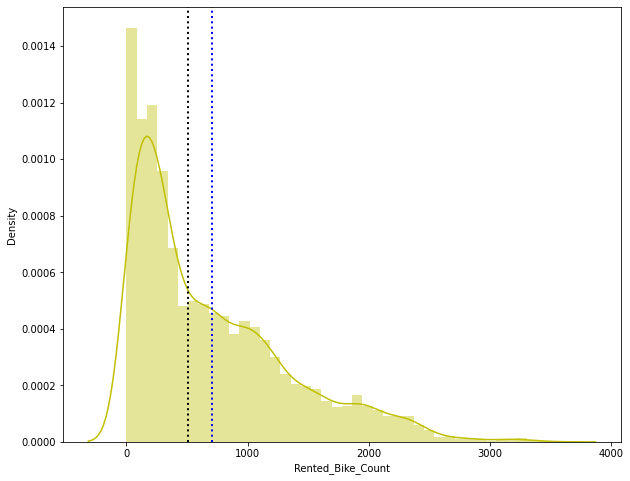

In [859]:
#Distribution plot for Rented_Bike_Count
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True,color= 'y')
ax.axvline(bike_df['Rented_Bike_Count'].mean(),color='blue', linestyle='dotted',linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dotted', linewidth=2)
plt.show()

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

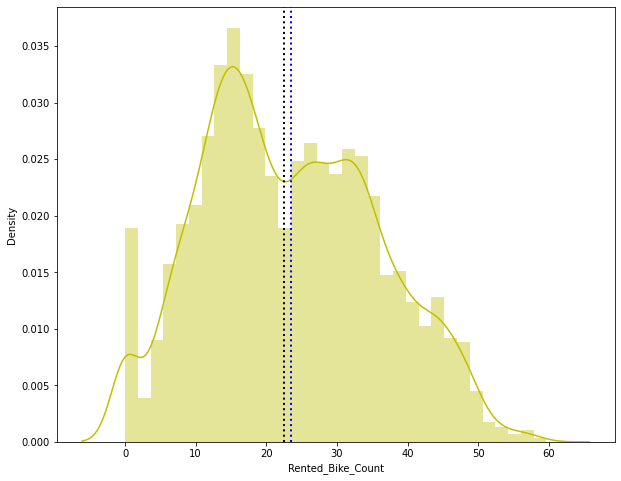

In [860]:
#Let's normalise the right skeweness of Dependent variable
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color='y')
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='blue', linestyle='dotted', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(),color='black', linestyle='dotted', linewidth=2)

plt.show()

* **We have generic rule of applying Square root for the skewed variable in order to make it normal. After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

#**Checking Corelation between Independent and Dependent variable**

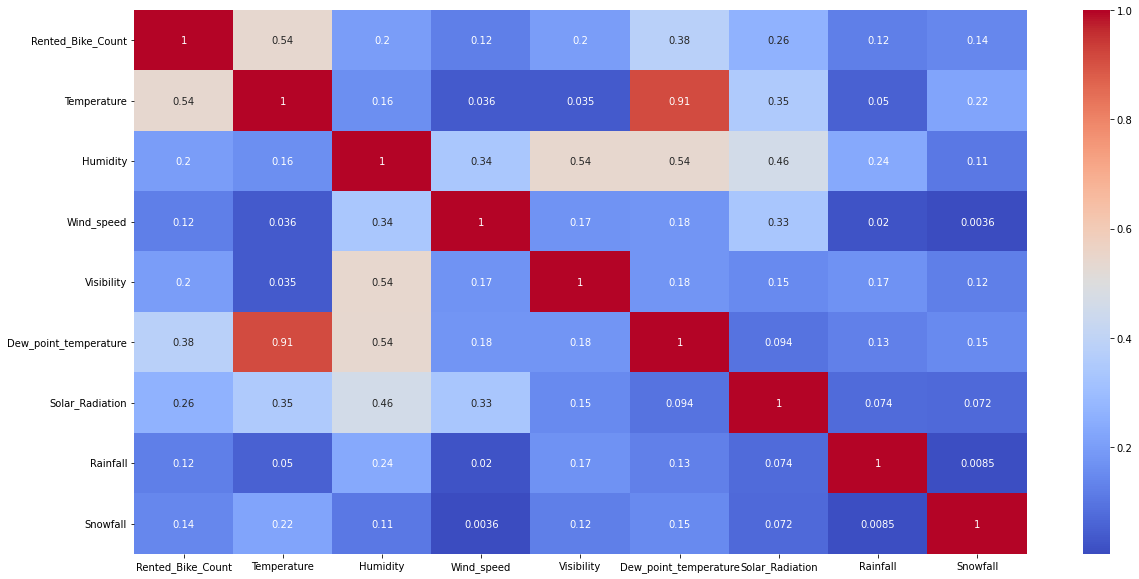

In [861]:
#plot the corelation map
plt.figure(figsize=(20,10))
corr=bike_df.corr()
sns.heatmap(data=abs(corr), annot=True, cmap='coolwarm')


 * **Temperature and Dew point Temperature are highly correlated.**

* **As per our regression assumption, there should not be colinearity between independent variables.**
* **We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them. As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.**

In [862]:
#Drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [863]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekdays_weekends  8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


#**Creating Dummy Variable for Model Training**

**A dataset may contain various type of values like integer values, categorical values, etc. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [864]:
#Assign categorical values to a variable
categorical = list(bike_df.select_dtypes(['object','category']))
categorical = pd.Index(categorical)
categorical

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays_weekends'],
      dtype='object')

#**One Hot Encoding**

**Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers or in numerical data type. This is required for both input and output variables.**

In [865]:
#Let's Create a copy
bike_df_copy = bike_df

In [866]:
#Let's do the One Hot Encoding
def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data = data.drop([column], axis=1)
  return data

for column in categorical:
  bike_df_copy = one_hot_encoding(bike_df_copy, column)

bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekends_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

#**Train Test Split For Regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate(test) how our model is performing on any unseen data. In this step we will split our data into training and testing set using scikit learn library.

In [867]:
#Dependent Variable
dependent_variable = 'Rented_Bike_Count'

In [868]:
dependent_variable

'Rented_Bike_Count'

In [869]:
#Independent_variable
independent_variable = list(set(bike_df_copy.columns.tolist())-{dependent_variable}) 

In [870]:
independent_variable

['weekdays_weekends_1',
 'Rainfall',
 'Month_6',
 'Month_11',
 'Humidity',
 'Visibility',
 'Hour_4',
 'Hour_17',
 'Hour_23',
 'Hour_20',
 'Month_9',
 'Wind_speed',
 'Hour_16',
 'Hour_7',
 'Month_2',
 'Solar_Radiation',
 'Hour_14',
 'Functioning_Day_Yes',
 'Hour_8',
 'Hour_6',
 'Hour_15',
 'Month_5',
 'Month_8',
 'Snowfall',
 'Hour_12',
 'Month_7',
 'Hour_21',
 'Hour_11',
 'Month_3',
 'Hour_9',
 'Hour_10',
 'Holiday_No Holiday',
 'Hour_2',
 'Seasons_Winter',
 'Hour_19',
 'Month_12',
 'Hour_3',
 'Hour_18',
 'Month_4',
 'Hour_13',
 'Month_10',
 'Hour_1',
 'Hour_5',
 'Hour_22',
 'Temperature',
 'Seasons_Spring',
 'Seasons_Summer']

In [871]:
#Assign the value in X and y
X = bike_df_copy[independent_variable]
y = np.sqrt(bike_df_copy[dependent_variable])

In [872]:
X.head()

,weekdays_weekends_1,Rainfall,Month_6,Month_11,Humidity,Visibility,Hour_4,Hour_17,Hour_23,Hour_20,...,Hour_18,Month_4,Hour_13,Month_10,Hour_1,Hour_5,Hour_22,Temperature,Seasons_Spring,Seasons_Summer
0,0,0.0,0,0,37,2000,0,0,0,0,...,0,0,0,0,0,0,0,-5.2,0,0
1,0,0.0,0,0,38,2000,0,0,0,0,...,0,0,0,0,1,0,0,-5.5,0,0
2,0,0.0,0,0,39,2000,0,0,0,0,...,0,0,0,0,0,0,0,-6.0,0,0
3,0,0.0,0,0,40,2000,0,0,0,0,...,0,0,0,0,0,0,0,-6.2,0,0
4,0,0.0,0,0,36,2000,1,0,0,0,...,0,0,0,0,0,0,0,-6.0,0,0


In [873]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

#**Spliting the Dataset into Train and Test data**

In [874]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)

(6132, 47)
(2628, 47)


#**Linear Regression**

**Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [875]:
#Implementation of Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

In [876]:
#Let's check the score
reg.score(X_train, y_train)

0.754759122743357

In [877]:
#Let's check the score
reg.score(X_test, y_test)

0.7686482214946604

In [878]:
#Check the Coefficient
reg.coef_

array([-7.53362433e-01, -1.52888046e+00,  3.99366431e+00,  7.65492065e-01,
       -1.38622779e-01,  3.75745689e-04, -9.85361203e+00,  4.24538423e+00,
        1.52899932e+00,  5.60762971e+00, -3.08396783e-01, -1.55550527e-01,
       -3.99904716e-01,  1.51455335e+00, -1.26373526e+00,  9.97189334e-01,
       -3.41200855e+00,  2.79258013e+01,  7.90729099e+00, -4.81736323e+00,
       -2.20442338e+00,  1.47738123e+00, -4.97278309e-01, -2.24389348e-02,
       -3.21245279e+00,  6.50612224e-02,  6.49658074e+00, -3.77572342e+00,
        6.01216686e-02,  6.49075241e-01, -3.50679261e+00,  2.33810428e+00,
       -4.91038032e+00, -7.20965734e+00,  7.14407680e+00,  1.28138303e+00,
       -7.62482489e+00,  9.72670552e+00,  5.93181321e-01, -3.16638374e+00,
        1.69216779e+00, -2.34918648e+00, -9.61696984e+00,  4.74567700e+00,
        4.59340367e-01, -3.20562363e+00, -3.59873163e+00])

In [879]:
#Get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [880]:
#Calculate Mean Square Error
MSE_for_LR =  mean_squared_error(y_train, y_pred_train)
print('Mean_Squared_Error_for_Linear_Regression : ',MSE_for_LR)

#Calculate Mean Absolute error
MAE_for_LR = mean_absolute_error(y_train, y_pred_train)
print('Mean_Absolute_Error_for_Linear_Regression :',MAE_for_LR)

#Calculate Root Mean Square Error
RMSE_for_LR = np.sqrt(MSE_for_LR)
print('Root_Mean_Square_Error_For_Linear_Regression :', RMSE_for_LR)

#Calculate r2 Score
r2_score_for_LR = r2_score(y_train, y_pred_train)
print('r2_score_for_LR :', r2_score_for_LR)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_LR :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Mean_Squared_Error_for_Linear_Regression :  38.09414735223389
Mean_Absolute_Error_for_Linear_Regression : 4.696506189493441
Root_Mean_Square_Error_For_Linear_Regression : 6.1720456375689485
r2_score_for_LR : 0.754759122743357
Adjusted_r2_score_for_LR : 0.7502915563747282


**Our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [881]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict={'Model':'Linear regression ',
       'MAE':round((MAE_for_LR),3),
       'MSE':round((MSE_for_LR),3),
       'RMSE':round((RMSE_for_LR),3),
       'R2_score':round((r2_score_for_LR),3),
       'Adjusted_R2':round((Adjusted_r2_score_for_lr ),2)
       }

#Creating traning result dataframe
training_df=pd.DataFrame(train_dict,index=[1])

In [882]:
#Calculate Mean Square Error
MSE_for_LR =  mean_squared_error(y_test, y_pred_test)
print('Mean_Squared_Error_for_Linear_Regression : ',MSE_for_LR)

#Calculate Mean Absolute error
MAE_For_LR = mean_absolute_error(y_test, y_pred_test)
print('Mean_Absolute_Error_for_Linear_Regression :',MAE_For_LR)

#Calculate Root Mean Square Error
RMSE_For_LR = np.sqrt(MSE_for_LR)
print('Root_Mean_Square_Error_For_Linear_Regression :', RMSE_For_LR)

#Calculate r2 Score
r2_score_for_LR = r2_score(y_test, y_pred_test)
print('r2_score_for_LR :', r2_score_for_LR)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted_r2_score_for_LR :",1-(1-r2_score(y_test, y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

Mean_Squared_Error_for_Linear_Regression :  35.674293014572164
Mean_Absolute_Error_for_Linear_Regression : 4.557275256369084
Root_Mean_Square_Error_For_Linear_Regression : 5.972796080109563
r2_score_for_LR : 0.7686482214946604
Adjusted_r2_score_for_LR : 0.7668609871768184


**The r2_score for the test set is 0.76. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [883]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict={'Model':'Linear regression ',
       'MAE':round((MAE_for_LR),3),
       'MSE':round((MSE_for_LR),3),
       'RMSE':round((RMSE_for_LR),3),
       'R2_score':round((r2_score_for_LR),3),
       'Adjusted_R2':round((Adjusted_r2_score_for_lr),2)
       }

#Creating traning result dataframe
test_df=pd.DataFrame(test_dict,index=[1])

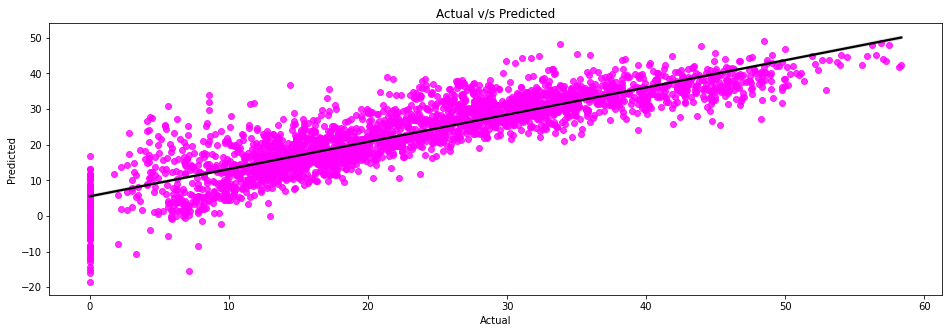

In [884]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test,y_test)

#**Lasso Regression**

In [885]:
#Implementation of Lasso Regression
lasso_reg = Lasso(alpha=1, max_iter=3000)

In [886]:
#Fitting the model
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1, max_iter=3000)

In [887]:
#Let's check the score
lasso_reg.score(X_train, y_train)

0.3980788042522758

In [888]:
#Let's check the score
lasso_reg.score(X_test, y_test)

0.4031636737839346

In [889]:
#Check the Coefficient
lasso_reg.coef_

array([-0.00000000e+00, -4.48311811e-01,  0.00000000e+00,  0.00000000e+00,
       -1.82532430e-01,  4.04408368e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.04482062e-01,  0.00000000e+00, -0.00000000e+00])

In [890]:
#check the intercept
lasso_reg.intercept_

25.79477757622805

In [891]:
#Get the X_train and X-test value
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)

In [892]:
#Calculate Mean Square Error
MSE_for_lasso =  mean_squared_error(y_train, y_pred_train_lasso)
print('Mean_Squared_Error_for_Lasso_Regression : ',MSE_for_lasso)

#Calculate Mean Absolute error
MAE_for_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print('Mean_Absolute_Error_for_Lasso_Regression :' , MAE_for_lasso)

#Calculate Root Mean Square Error
RMSE_for_lasso = np.sqrt(MSE_for_lasso)
print('Root_Mean_Square_Error_For_Lasso_Regression :', RMSE_for_lasso)

#Calculate r2 Score
r2_score_for_lasso = r2_score(y_train, y_pred_train_lasso)
print('r2_score_for_lasso :', r2_score_for_lasso)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_lasso :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_Lasso_Regression :  93.4985838484457
Mean_Absolute_Error_for_Lasso_Regression : 7.352669303562187
Root_Mean_Square_Error_For_Lasso_Regression : 9.66946657517599
r2_score_for_lasso : 0.3980788042522758
Adjusted_r2_score_for_lasso : 0.38711357316694917


**Our r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [893]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict={'Model':'Lasso regression ',
       'MAE':round((MAE_for_lasso),3),
       'MSE':round((MSE_for_lasso),3),
       'RMSE':round((RMSE_for_lasso),3),
       'R2_score':round((r2_score_for_lasso),3),
       'Adjusted_R2':round((Adjusted_r2_score_for_lasso),2)
       }

#Creating traning result dataframe
training_df=training_df.append(train_dict,ignore_index=True)

In [894]:
#Calculate Mean Square Error
MSE_for_lasso =  mean_squared_error(y_test, y_pred_test_lasso)
print('Mean_Squared_Error_for_Lasso_Regression : ',MSE_for_lasso)

#Calculate Mean Absolute error
MAE_for_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
print('Mean_Absolute_Error_for_Lasso_Regression :' , MAE_for_lasso)

#Calculate Root Mean Square Error
RMSE_for_lasso = np.sqrt(MSE_for_lasso)
print('Root_Mean_Square_Error_For_Lasso_Regression :', RMSE_for_lasso)

#Calculate r2 Score
r2_score_for_lasso = r2_score(y_test, y_pred_test_lasso)
print('r2_score_for_lasso :', r2_score_for_lasso)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lasso = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_lasso :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_Lasso_Regression :  92.03177136017256
Mean_Absolute_Error_for_Lasso_Regression : 7.235210933908688
Root_Mean_Square_Error_For_Lasso_Regression : 9.59331910029957
r2_score_for_lasso : 0.4031636737839346
Adjusted_r2_score_for_lasso : 0.3922910740427893


**The r2_score for the test set is 0.40. This means our linear model is not performing well on the data.**

In [895]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict={'Model':'Lasso regression ',
       'MAE':round((MAE_for_lasso),3),
       'MSE':round((MSE_for_lasso),3),
       'RMSE':round((RMSE_for_lasso),3),
       'R2_score':round((r2_score_for_lasso),3),
       'Adjusted_R2':round((Adjusted_r2_score_for_lasso),2)
       }

#Creating traning result dataframe
test_df=test_df.append(test_dict,ignore_index=True)

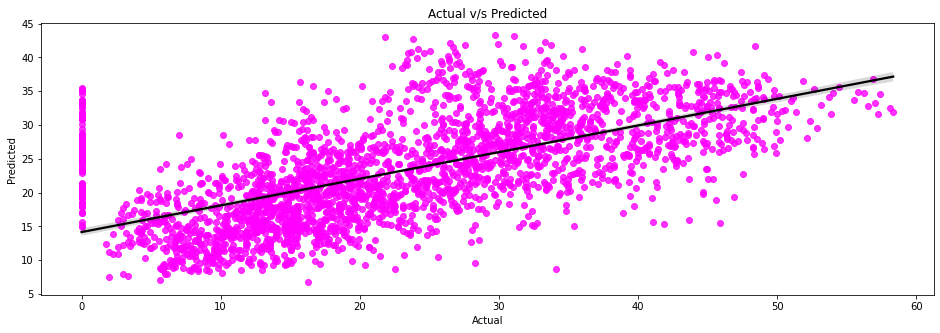

In [896]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_lasso,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_lasso,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_lasso,y_test)

#**Ridge Regression**

In [897]:
#Implementation of Ridge Regression
ridge_reg = Ridge(alpha=0.1)

In [898]:
#Fitting the model
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [899]:
#Let's check the score
ridge_reg.score(X_train, y_train)

0.7547590235841086

In [900]:
#Let's check the score
ridge_reg.score(X_test, y_test)

0.7686514077173253

In [901]:
#Get the X_train and X-test value
y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)

In [902]:
#Calculate Mean Square Error
MSE_for_ridge =  mean_squared_error(y_train, y_pred_train_ridge)
print('Mean_Squared_Error_for_Ridge_Regression : ',MSE_for_ridge)

#Calculate Mean Absolute error
MAE_for_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print('Mean_Absolute_Error_for_Ridge_Regression :' , MAE_for_ridge)

#Calculate Root Mean Square Error
RMSE_for_ridge = np.sqrt(MSE_for_ridge)
print('Root_Mean_Square_Error_For_Ridge_Regression :', RMSE_for_ridge)

#Calculate r2 Score
r2_score_for_ridge = r2_score(y_train, y_pred_train_ridge)
print('r2_score_for_ridge :', r2_score_for_ridge)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_ridge = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_ridge :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_Ridge_Regression :  38.09416275499652
Mean_Absolute_Error_for_Ridge_Regression : 4.696611837350968
Root_Mean_Square_Error_For_Ridge_Regression : 6.172046885353069
r2_score_for_ridge : 0.7547590235841086
Adjusted_r2_score_for_ridge : 0.7502914554090905


**Our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [903]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Ridge regression',
              'MAE' : round((MAE_for_ridge),3),
              'MSE' : round((MSE_for_ridge),3),
              'RMSE' : round((RMSE_for_ridge),3),
              'R2_score' : round((r2_score_for_ridge),3),
              'Adjusted_R2' : round((Adjusted_r2_score_for_ridge),2)
             }
training_df = training_df.append(train_dict,ignore_index=True)


In [904]:
#Calculate Mean Square Error
MSE_for_ridge =  mean_squared_error(y_test, y_pred_test_ridge)
print('Mean_Squared_Error_for_Ridge_Regression : ',MSE_for_ridge)

#Calculate Mean Absolute error
MAE_for_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
print('Mean_Absolute_Error_for_Ridge_Regression :' , MAE_for_ridge)

#Calculate Root Mean Square Error
RMSE_for_ridge = np.sqrt(MSE_for_ridge)
print('Root_Mean_Square_Error_For_Ridge_Regression :', RMSE_for_ridge)

#Calculate r2 Score
r2_score_for_ridge = r2_score(y_test, y_pred_test_ridge)
print('r2_score_for_ridge :', r2_score_for_ridge)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_ridge = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_ridge :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_Ridge_Regression :  35.67380170112001
Mean_Absolute_Error_for_Ridge_Regression : 4.557363318023901
Root_Mean_Square_Error_For_Ridge_Regression : 5.9727549507007245
r2_score_for_ridge : 0.7686514077173253
Adjusted_r2_score_for_ridge : 0.7644369178579122


**Our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [905]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Ridge regression',
         'MAE' : round((MAE_for_ridge),3),
         'MSE' : round((MSE_for_ridge),3),
         'RMSE' : round((RMSE_for_ridge),3),
         'R2_score' : round((r2_score_for_ridge),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_ridge),2)
         }
test_df = test_df.append(test_dict,ignore_index=True)

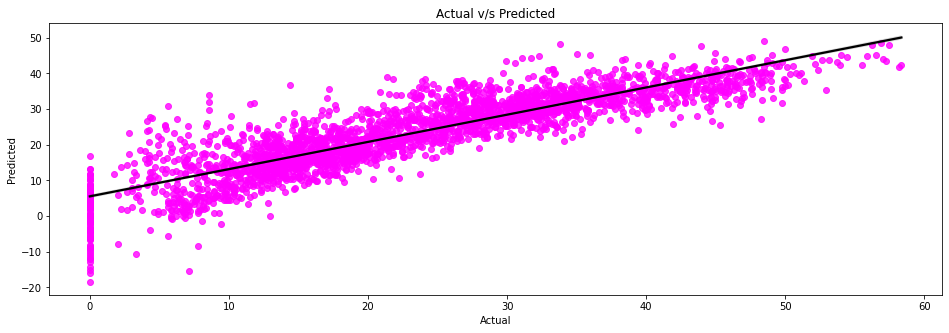

In [906]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_ridge,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_ridge,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_ridge,y_test)

#**Elastic Net Regression**

In [907]:
#Implementation of Elastic net regression
elastic_reg = ElasticNet(alpha=0.0001, l1_ratio=0.5)


In [908]:
#Let's fit into the model
elastic_reg.fit(X_train, y_train)

ElasticNet(alpha=0.0001)

In [909]:
#Let's check the score
elastic_reg.score(X_train, y_train)

0.7547579479436548

In [910]:
#Let's check the score
elastic_reg.score(X_test, y_test)

0.7686605164296376

In [911]:
#Get the X_train and X-test value
y_pred_train_elastic = elastic_reg.predict(X_train)
y_pred_test_elastic = elastic_reg.predict(X_test)

In [912]:
#Calculate Mean Square Error
MSE_for_elastic =  mean_squared_error(y_train, y_pred_train_elastic)
print('Mean_Squared_Error_for_elasticnet_Regression : ',MSE_for_elastic)

#Calculate Mean Absolute error
MAE_for_elastic = mean_absolute_error(y_train, y_pred_train_elastic)
print('Mean_Absolute_Error_for_elasticnet_Regression :' , MAE_for_elastic)

#Calculate Root Mean Square Error
RMSE_for_elastic = np.sqrt(MSE_for_elastic)
print('Root_Mean_Square_Error_For_elasticnet_Regression :', RMSE_for_elastic)

#Calculate r2 Score
r2_score_for_elastic = r2_score(y_train, y_pred_train_elastic)
print('r2_score_for_elastic :', r2_score_for_elastic)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_elastic = (1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_elastic :",1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_elasticnet_Regression :  38.094329838096215
Mean_Absolute_Error_for_elasticnet_Regression : 4.696792848655073
Root_Mean_Square_Error_For_elasticnet_Regression : 6.172060420807319
r2_score_for_elastic : 0.7547579479436548
Adjusted_r2_score_for_elastic : 0.7502903601736362


**Our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [913]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Elastic net Regression',
         'MAE' : round((MAE_for_elastic),3),
         'MSE' : round((MAE_for_elastic),3),
         'RMSE' : round((RMSE_for_elastic),3),
         'R2_score' : round((r2_score_for_elastic),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_elastic),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)

In [914]:
#Calculate Mean Square Error
MSE_for_elastic =  mean_squared_error(y_test, y_pred_test_elastic)
print('Mean_Squared_Error_for_elasticnet_Regression : ',MSE_for_elastic)

#Calculate Mean Absolute error
MAE_for_elastic = mean_absolute_error(y_test, y_pred_test_elastic)
print('Mean_Absolute_Error_for_elasticnet_Regression :' , MAE_for_elastic)

#Calculate Root Mean Square Error
RMSE_for_elastic = np.sqrt(MSE_for_elastic)
print('Root_Mean_Square_Error_For_elasticnet_Regression :', RMSE_for_elastic)

#Calculate r2 Score
r2_score_for_elastic = r2_score(y_test, y_pred_test_elastic)
print('r2_score_for_elasticnet :', r2_score_for_elastic)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_elastic = (1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_elasticnet :",1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_elasticnet_Regression :  35.67239714363568
Mean_Absolute_Error_for_elasticnet_Regression : 4.557498062732169
Root_Mean_Square_Error_For_elasticnet_Regression : 5.97263736917249
r2_score_for_elasticnet : 0.7686605164296376
Adjusted_r2_score_for_elasticnet : 0.764446192504131


**Our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [915]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Elastic net Regression',
         'MAE' : round((MAE_for_elastic),3),
         'MSE' : round((MSE_for_elastic),3),
         'RMSE' : round((RMSE_for_elastic),3),
         'R2_score' : round((r2_score_for_elastic),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_elastic),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)


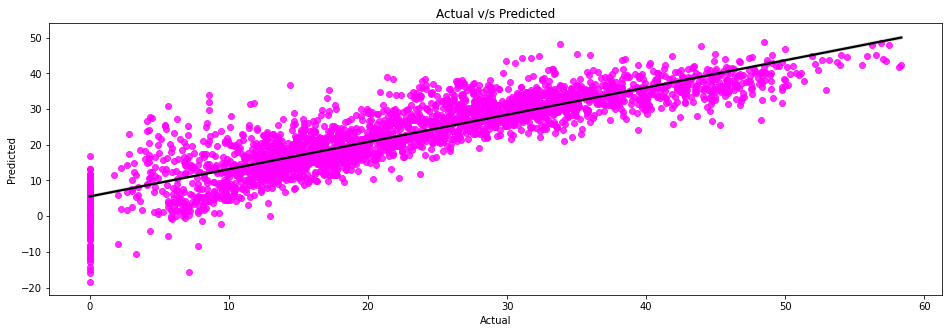

In [916]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_elastic,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_elastic,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_elastic,y_test)

#**Cross validation on Lasso Regression**

In [917]:
#Let's do a cross validation on Lasso regression
lasso_reg_cv=Lasso()

#alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_reg_cv, alphas, scoring='neg_mean_squared_error', cv=5)
#Fitting Into model
lasso_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [918]:
#Since it showing best parameter of alpha, means it will be as linear regression.
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.001}
The best negative mean squared error value is -38.89802684241066


#**Cross Validation on Ridge Regression**

In [919]:
#Let's do a cross validation on Ridge regression
ridge_reg=Ridge()

#alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=5)
#Fitting Into model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [920]:
#Since it showing best parameter of alpha, means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squared error value is -38.90030466721884


#**Cross Validation on Elastic Net Regression**

In [921]:
#Let's do a cross validation on Elastic Net Regression 
elasticnet_reg = ElasticNet()

In [922]:
#alphas value's dictionary to pass on in GridsearchCv

alphas_l1 = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio' : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

elasticnet_linear_reg = GridSearchCV(elasticnet_reg, alphas_l1, scoring = 'neg_mean_squared_error', cv=5)

#fitting into the model

elasticnet_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [923]:
#Since it showing best parameter of alpha, means it will be as linear regression.
print(f'The best alpha value is {elasticnet_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {elasticnet_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.001, 'l1_ratio': 0.9}
The best negative mean squared error value is -38.8979183094282


#**Decision Tree Regressor**

### Some facts about Decision Tree :
<b>Easy to Understand:</b> Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.


<b>Useful in Data exploration: </b> Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
</b>Less data cleaning required:</b> It requires less data cleaning compared to some other modeling techniques. <b>It is not influenced by outliers and missing values to a fair degree.</b>


<b>Non Parametric Method:</b> Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

### <b>Disadvantages</b>


<b>Over fitting:</b> Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.

In [924]:
#Implementation of Decision tree regressor
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=9, max_leaf_nodes=100, max_features=9, random_state = 2)

In [925]:
#Fitting into the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=9,
                      max_leaf_nodes=100, random_state=2)

In [926]:
#Let's check the score
dt_regressor.score(X_train, y_train)

0.7124724042944051

In [927]:
#Let's check the score
dt_regressor.score(X_test, y_test)

0.6844944938495218

In [928]:
#Get the X_train and X-test value
y_pred_train_dt = dt_regressor.predict(X_train)
y_pred_test_dt = dt_regressor.predict(X_test)

In [929]:
#Checking the Model score
print("Model Score:",dt_regressor.score(X_train,y_train))

#Calculate Mean Square Error
MSE_for_dt =  mean_squared_error(y_train, y_pred_train_dt)
print('Mean_Squared_Error_for_Decision_tree_Regression : ',MSE_for_dt)

#Calculate Mean Absolute error
MAE_for_dt = mean_absolute_error(y_train, y_pred_train_dt)
print('Mean_Absolute_Error_for_Decision_tree_Regression :' , MAE_for_dt)

#Calculate Root Mean Square Error
RMSE_for_dt = np.sqrt(MSE_for_dt)
print('Root_Mean_Square_Error_For_Decision_tree_Regression :', RMSE_for_dt)

#Calculate r2 Score
r2_score_for_dt = r2_score(y_train, y_pred_train_dt)
print('r2_score_for_Decision_tree :', r2_score_for_dt)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_dt = (1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Decision_tree :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7124724042944051
Mean_Squared_Error_for_Decision_tree_Regression :  44.662695392253454
Mean_Absolute_Error_for_Decision_tree_Regression : 4.927033106838
Root_Mean_Square_Error_For_Decision_tree_Regression : 6.683015441569281
r2_score_for_Decision_tree : 0.7124724042944051
Adjusted_r2_score_for_Decision_tree : 0.7072344984811636


**Looks like our r2 score value is 0.71 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [930]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Decision Tree Regression',
         'MAE' : round((MAE_for_dt),3),
         'MSE' : round((MSE_for_dt),3),
         'RMSE' : round((RMSE_for_dt),3),
         'R2_score' : round((r2_score_for_dt),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_dt),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)


In [931]:
#Checking the Model score
print("Model Score:",dt_regressor.score(X_test,y_test))

#Calculate Mean Square Error
MSE_for_dt =  mean_squared_error(y_test, y_pred_test_dt)
print('Mean_Squared_Error_for_Decision_tree_Regression : ',MSE_for_dt)

#Calculate Mean Absolute error
MAE_for_dt = mean_absolute_error(y_test, y_pred_test_dt)
print('Mean_Absolute_Error_for_Decision_tree_Regression :' , MAE_for_dt)

#Calculate Root Mean Square Error
RMSE_for_dt = np.sqrt(MSE_for_dt)
print('Root_Mean_Square_Error_For_Decision_tree_Regression :', RMSE_for_dt)

#Calculate r2 Score
r2_score_for_dt = r2_score(y_test, y_pred_test_dt)
print('r2_score_for_Decision_tree :', r2_score_for_dt)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_dt = (1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Decision_tree :",1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6844944938495218
Mean_Squared_Error_for_Decision_tree_Regression :  48.650742807508976
Mean_Absolute_Error_for_Decision_tree_Regression : 5.015529078242668
Root_Mean_Square_Error_For_Decision_tree_Regression : 6.97500844497761
r2_score_for_Decision_tree : 0.6844944938495218
Adjusted_r2_score_for_Decision_tree : 0.6787469129235247


**Looks like our r2 score value is 0.68 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [932]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Decision Tree Regression',
         'MAE' : round((MAE_for_dt),3),
         'MSE' : round((MSE_for_dt),3),
         'RMSE' : round((RMSE_for_dt),3),
         'R2_score' : round((r2_score_for_dt),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_dt),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)


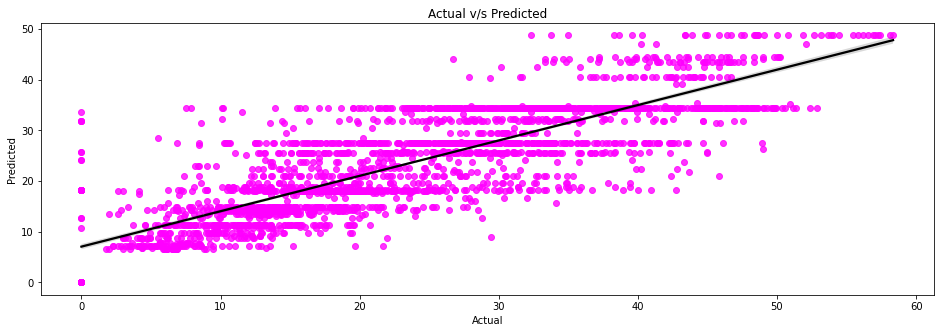

In [933]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_dt,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_dt,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_dt, y_test)

#**Visualization Decision Tree**

In [934]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

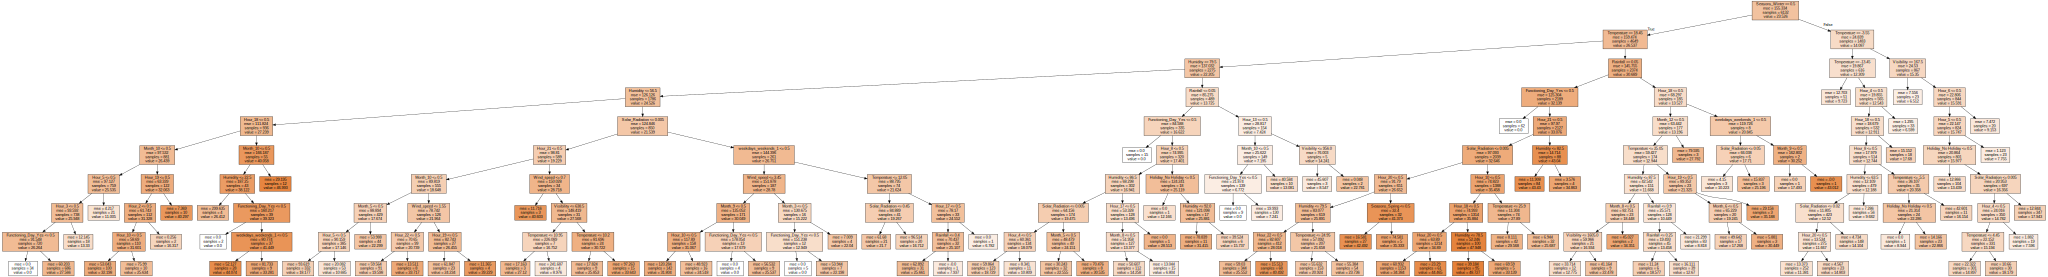

In [935]:
#Let's visualise the tree
graph = Source(tree.export_graphviz(dt_regressor, out_file=None
   , feature_names=X_train.columns, 
    filled = True))
display(SVG(graph.pipe(format='svg')))

#**Hyperparameter tuning**

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

In [936]:
#Hyperparameter tuning
tree = DecisionTreeRegressor()
parameters = {'criterion' : ['mse'],
              'max_depth' :[3,5,7,9,None],
              'max_leaf_nodes' : [50,70,100],
              'max_features' : ['auto', 'log2', 9],
             }


In [937]:
#Tuning the model
tuning_model = GridSearchCV(tree, param_grid= parameters, scoring= 'neg_mean_squared_error', cv=5, verbose=0)
tuning_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2', 9],
                         'max_leaf_nodes': [50, 70, 100]},
             scoring='neg_mean_squared_error')

In [938]:
tuning_model.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 100}

In [939]:
#Let's implement the best parameters in Decision tree regressor
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth= None, max_leaf_nodes=100, max_features='auto', random_state = 2)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_features='auto', max_leaf_nodes=100,
                      random_state=2)

In [940]:
#check the score
dt_regressor.score(X_train, y_train)

0.8794270108469973

Text(0.5, 0, 'Relative Importance')

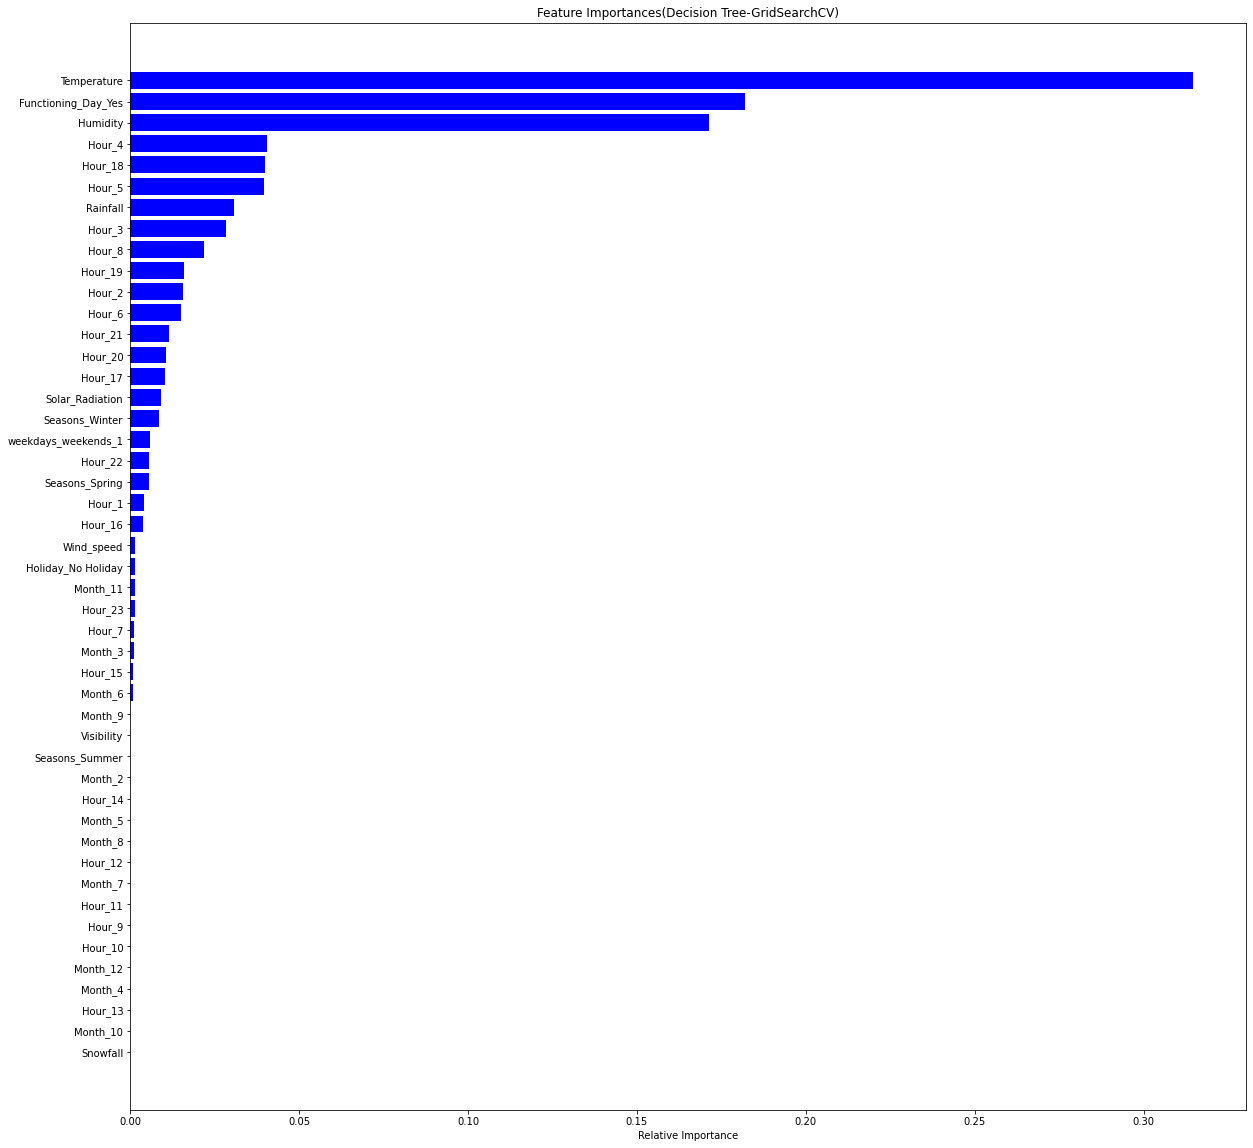

In [941]:
#Let's check the important variables
imp_variables=X.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

**We have applied this best parametrs to above Decsion tree regressor model.**

#**Random Forest Regressor**

## **Random Forest**

*   In Random Forest, we grow multiple trees as opposed to a single tree in CART model.
*   We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
*   To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
*   The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

#### **How does it work?**

It works in the following manner:

*   Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but *with replacement.* This sample will be the training set for growing the tree.
*   If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
*   Each tree is grown to the largest extent possible and  there is no pruning.
*   Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

#### **Advantages**

*   This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
*   RF has the power of handling large datasets with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).
*   It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data is missing.
*   It has methods for balancing errors in data sets where classes are imbalanced.
*   The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
*   Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third (say) of the data is not used for training and can be used to testing. These are called the out of bag samples. Error estimated on these out of bag samples is known as out of bag error. Out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

#### **Disadvantages**

*   It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
*   Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

In [942]:
#Implementation of Model
rf_regressor = RandomForestRegressor()

In [943]:
#Fitting into the Model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [944]:
#Check the score
rf_regressor.score(X_train, y_train)

0.9859786248532466

In [945]:
#check the score
rf_regressor.score(X_test, y_test)

0.9067617679267878

In [946]:
#Get the X_train and X-test value
y_pred_test_rf = rf_regressor.predict(X_test)
y_pred_train_rf = rf_regressor.predict(X_train)

In [947]:
#Checking the Model score
print("Model Score:",rf_regressor.score(X_train,y_train))

#Calculate Mean Square Error
MSE_for_rf =  mean_squared_error(y_train, y_pred_train_rf)
print('Mean_Squared_Error_for_Random_Forest__Regression : ',MSE_for_rf)

#Calculate Mean Absolute error
MAE_for_rf = mean_absolute_error(y_train, y_pred_train_rf)
print('Mean_Absolute_Error_for_Random_Forest_Regression :' , MAE_for_rf)

#Calculate Root Mean Square Error
RMSE_for_rf = np.sqrt(MSE_for_rf)
print('Root_Mean_Square_Error_For_Random_Forest_Regression :', RMSE_for_rf)

#Calculate r2 Score
r2_score_for_rf = r2_score(y_train, y_pred_train_rf)
print('r2_score_for_Random_Forest :', r2_score_for_rf)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_rf = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Random_Forest :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9859786248532466
Mean_Squared_Error_for_Random_Forest__Regression :  2.1779906225111354
Mean_Absolute_Error_for_Random_Forest_Regression : 0.975795325699433
Root_Mean_Square_Error_For_Random_Forest_Regression : 1.475801688070296
r2_score_for_Random_Forest : 0.9859786248532466
Adjusted_r2_score_for_Random_Forest : 0.9857231967013483


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [948]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Random Forest Regression',
         'MAE' : round((MAE_for_rf),3),
         'MSE' : round((MSE_for_rf),3),
         'RMSE' : round((RMSE_for_rf),3),
         'R2_score' : round((r2_score_for_rf),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_rf),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)


In [949]:
#Checking the Model score
print("Model Score:",rf_regressor.score(X_test,y_test))

#Calculate Mean Square Error
MSE_for_rf =  mean_squared_error(y_test, y_pred_test_rf)
print('Mean_Squared_Error_for_Random_Forest_Regression : ',MSE_for_rf)

#Calculate Mean Absolute error
MAE_for_rf = mean_absolute_error(y_test, y_pred_test_rf)
print('Mean_Absolute_Error_for_Random_Forest_Regression :' , MAE_for_rf)

#Calculate Root Mean Square Error
RMSE_for_rf = np.sqrt(MSE_for_rf)
print('Root_Mean_Square_Error_For_Random_Forest_Regression :', RMSE_for_rf)

#Calculate r2 Score
r2_score_for_rf = r2_score(y_test, y_pred_test_rf)
print('r2_score_for_Random_Forest :', r2_score_for_rf)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_rf = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Random_Forest :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_train.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9067617679267878
Mean_Squared_Error_for_Random_Forest_Regression :  14.37727443735076
Mean_Absolute_Error_for_Random_Forest_Regression : 2.5336150465682956
Root_Mean_Square_Error_For_Random_Forest_Regression : 3.7917376540777132
r2_score_for_Random_Forest : 0.9067617679267878
Adjusted_r2_score_for_Random_Forest : 0.7784327128523783


**Looks like our r2 score value is 0.90 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [950]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Random Forest Regression',
         'MAE' : round((MAE_for_rf),3),
         'MSE' : round((MSE_for_rf),3),
         'RMSE' : round((RMSE_for_rf),3),
         'R2_score' : round((r2_score_for_rf),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_rf),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)


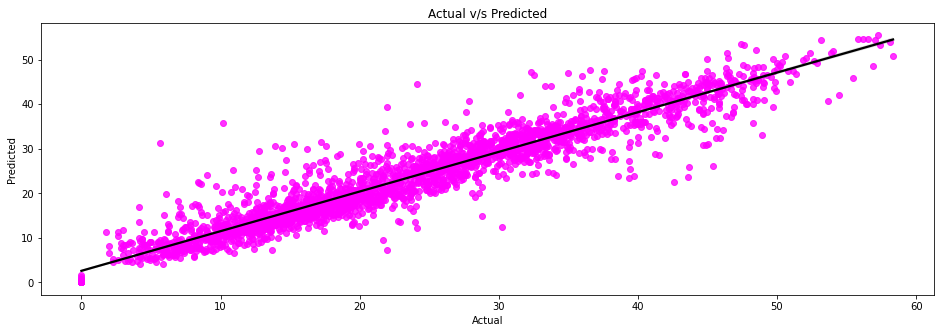

In [951]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_rf,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_rf,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_rf, y_test)

Let's see the Important Features

Text(0.5, 0, 'Relative Importance')

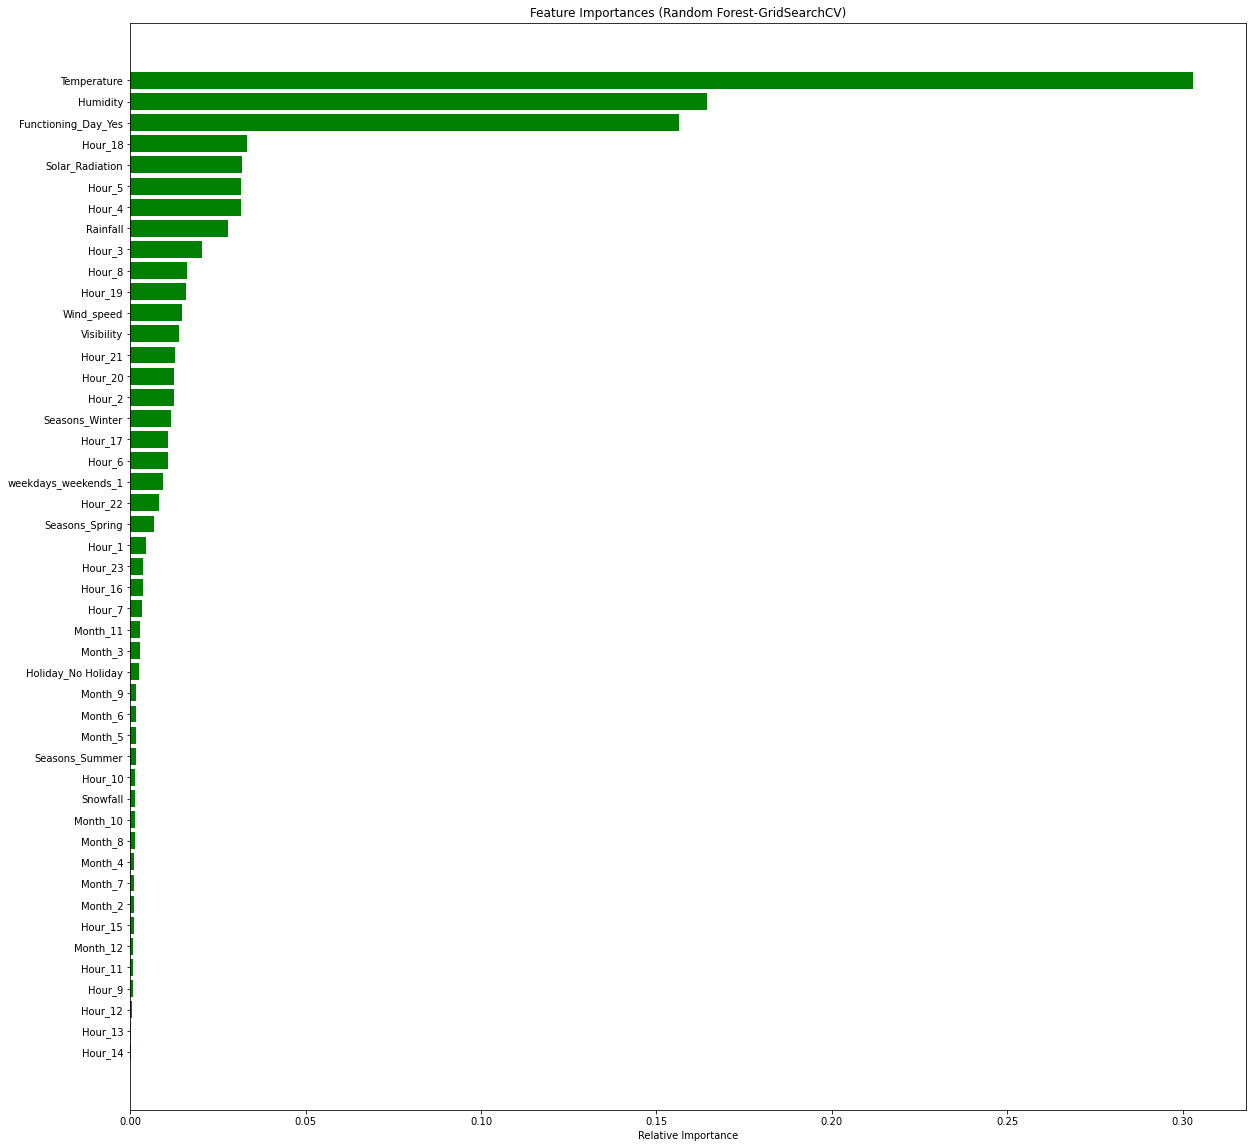

In [952]:
#Let's check the important variables
imp_variables=X.columns
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances (Random Forest-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

**By looking at the graph we can say that temperature and hours plays very important role on bike rentals.**

#**Gradient Boosting**

In [953]:
#Implementation of Model
gb_reg = GradientBoostingRegressor()

In [954]:
#Fitting into the Model
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [955]:
#check the score
gb_reg.score(X_train, y_train)

0.8618933444939265

In [956]:
#Check the score
gb_reg.score(X_test, y_test)

0.8506511923350074

In [957]:
#Get the X_train and X_test value
y_pred_test_gb = gb_reg.predict(X_test)
y_pred_train_gb = gb_reg.predict(X_train)

In [958]:
#Checking the Model score
print("Model Score:",gb_reg.score(X_train,y_train))

#Calculate Mean Square Error
MSE_for_gb =  mean_squared_error(y_train, y_pred_train_gb)
print('Mean_Squared_Error_for_Gradient_Boosting : ',MSE_for_gb)

#Calculate Mean Absolute error
MAE_for_gb = mean_absolute_error(y_train, y_pred_train_gb)
print('Mean_Absolute_Error_for_Gradient_Boosting :' , MAE_for_gb)

#Calculate Root Mean Square Error
RMSE_for_gb = np.sqrt(MSE_for_gb)
print('Root_Mean_Square_Error_For_Gradient_Boosting :', RMSE_for_gb)

#Calculate r2 Score
r2_score_for_gb = r2_score(y_train, y_pred_train_gb)
print('r2_score_for_Gradient_Boosting :', r2_score_for_gb)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8618933444939265
Mean_Squared_Error_for_Gradient_Boosting :  21.452603432285493
Mean_Absolute_Error_for_Gradient_Boosting : 3.4962772109558107
Root_Mean_Square_Error_For_Gradient_Boosting : 4.6316955245660845
r2_score_for_Gradient_Boosting : 0.8618933444939265
Adjusted_r2_score_for_Gradient_Boosting : 0.8593774480564128


**Looks like our r2 score value is 0.86 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [959]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Gradient Boosting',
         'MAE' : round((MAE_for_gb),3),
         'MSE' : round((MSE_for_gb),3),
         'RMSE' : round((RMSE_for_gb),3),
         'R2_score' : round((r2_score_for_gb),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)


In [960]:
#Checking the Model score
print("Model Score:",gb_reg.score(X_test,y_test))

#Calculate Mean Square Error
MSE_for_gb =  mean_squared_error(y_test, y_pred_test_gb)
print('Mean_Squared_Error_for_Gradient_Boosting : ',MSE_for_gb)

#Calculate Mean Absolute error
MAE_for_gb = mean_absolute_error(y_test, y_pred_test_gb)
print('Mean_Absolute_Error_for_Gradient_Boosting :' , MAE_for_gb)

#Calculate Root Mean Square Error
RMSE_for_gb = np.sqrt(MSE_for_gb)
print('Root_Mean_Square_Error_For_Gradient_Boosting :', RMSE_for_gb)

#Calculate r2 Score
r2_score_for_gb = r2_score(y_test, y_pred_test_gb)
print('r2_score_for_Gradient_Boosting :', r2_score_for_gb)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting :",1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8506511923350074
Mean_Squared_Error_for_Gradient_Boosting :  23.029488515018947
Mean_Absolute_Error_for_Gradient_Boosting : 3.58047294932561
Root_Mean_Square_Error_For_Gradient_Boosting : 4.798904928733111
r2_score_for_Gradient_Boosting : 0.8506511923350074
Adjusted_r2_score_for_Gradient_Boosting : 0.8479304970015754


**Looks like our r2 score value is 0.85 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [961]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Gradient Boosting',
         'MAE' : round((MAE_for_gb),3),
         'MSE' : round((MSE_for_gb),3),
         'RMSE' : round((RMSE_for_gb),3),
         'R2_score' : round((r2_score_for_gb),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)


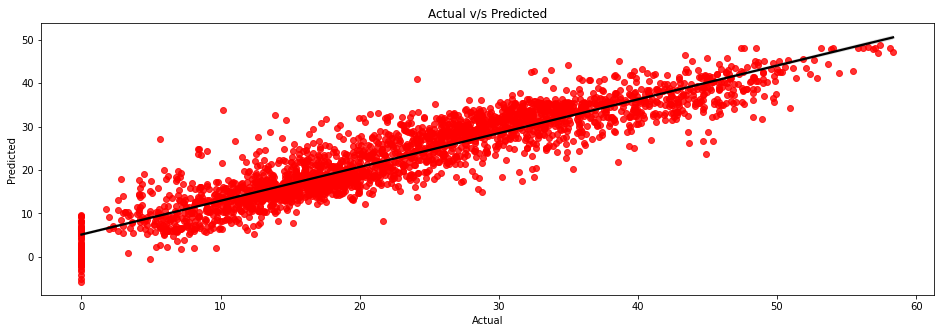

In [962]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_gb,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_gb,scatter_kws={'color':'red'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_gb, y_test)

<b> Let's see the important features

Text(0.5, 0, 'Relative Importance')

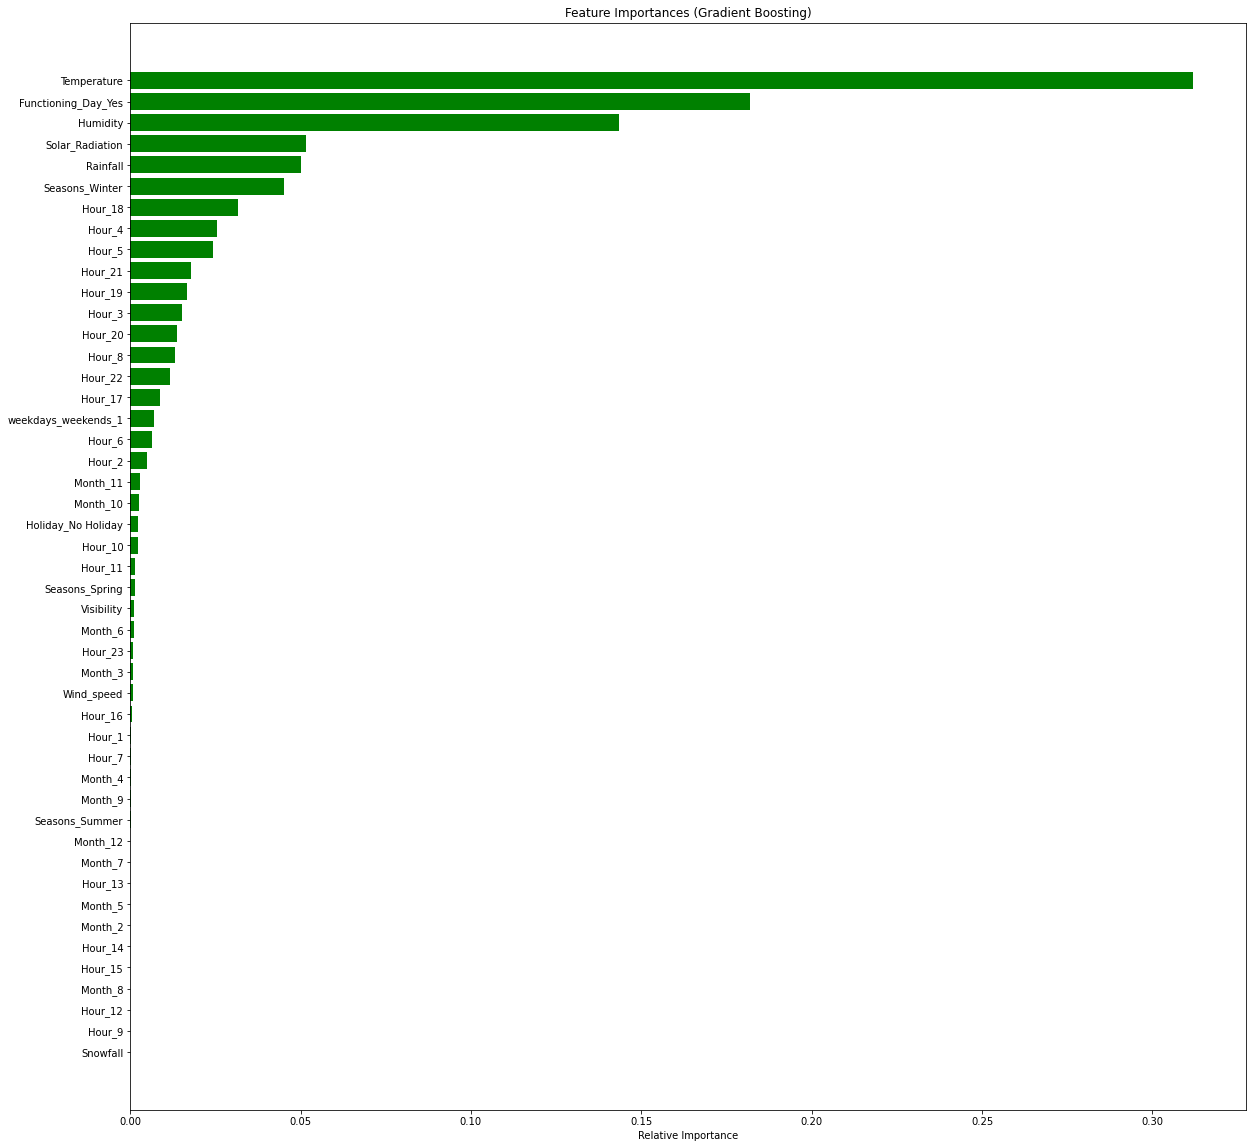

In [963]:
#Let's check the important variables
imp_variables=X.columns
importances = gb_reg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances (Gradient Boosting)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

#**Hyperparameter Tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

In [964]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [965]:
#Create an instance for Gradient boosting regressor
gb_reg = GradientBoostingRegressor()

In [966]:
#Create GridSearchCv
gb_grid = GridSearchCV(estimator=gb_reg, param_grid= param_dict, cv=5, verbose=2)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [983]:
#Check the best estimator
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [987]:
#Best parameters for gb
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [988]:
#Let's train the optimal model
gb_reg_optimal = gb_grid.best_estimator_

In [989]:
#Check the score
gb_reg_optimal.score(X_train, y_train)

0.9315330030230752

In [990]:
#Check the score
gb_reg_optimal.score(X_test, y_test)

0.9128367342078767

In [991]:
#Get the X_tarin and X_test value
y_pred_test_gb_optimal = gb_reg_optimal.predict(X_test)
y_pred_train_gb_optimal = gb_reg_optimal.predict(X_train)

In [992]:
#Checking the Model score
print("Model Score:",gb_reg_optimal.score(X_train,y_train))

#Calculate Mean Square Error
MSE_for_gb_reg_optimal =  mean_squared_error(y_train, y_pred_train_gb_optimal)
print('Mean_Squared_Error_for_Gradient_Boosting_optimal : ',MSE_for_gb_reg_optimal)

#Calculate Mean Absolute error
MAE_for_gb_reg_optimal = mean_absolute_error(y_train, y_pred_train_gb_optimal)
print('Mean_Absolute_Error_for_Gradient_Boosting_optimal :' , MAE_for_gb_reg_optimal)

#Calculate Root Mean Square Error
RMSE_for_gb_reg_optimal = np.sqrt(MSE_for_gb_reg_optimal)
print('Root_Mean_Square_Error_For_Gradient_Boosting_optimal :', RMSE_for_gb_reg_optimal)

#Calculate r2 Score
r2_score_for_gb_reg_optimal = r2_score(y_train, y_pred_train_gb_optimal)
print('r2_score_for_Gradient_Boosting_optimal :', r2_score_for_gb_reg_optimal)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb_reg_optimal = (1-(1-r2_score(y_train, y_pred_train_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting_optimal :",1-(1-r2_score(y_train, y_pred_train_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9315330030230752
Mean_Squared_Error_for_Gradient_Boosting_optimal :  10.63522484823959
Mean_Absolute_Error_for_Gradient_Boosting_optimal : 2.2708225048436144
Root_Mean_Square_Error_For_Gradient_Boosting_optimal : 3.261169245568158
r2_score_for_Gradient_Boosting_optimal : 0.9315330030230752
Adjusted_r2_score_for_Gradient_Boosting_optimal : 0.9302857360238832


**Our r2 score value is 0.93 that means our model is  able to capture most of the data variance. Lets save it in a dataframe.**

In [993]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Gradient Boosting GridSearchCV',
         'MAE' : round((MAE_for_gb_reg_optimal),3),
         'MSE' : round((MSE_for_gb_reg_optimal),3),
         'RMSE' : round((RMSE_for_gb_reg_optimal),3),
         'R2_score' : round((r2_score_for_gb_reg_optimal),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb_reg_optimal),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)


In [994]:
#Checking the Model score
print("Model Score:",gb_reg_optimal.score(X_test,y_test))

#Calculate Mean Square Error
MSE_for_gb_reg_optimal =  mean_squared_error(y_test, y_pred_test_gb_optimal)
print('Mean_Squared_Error_for_Gradient_Boosting_optimal : ',MSE_for_gb_reg_optimal)

#Calculate Mean Absolute error
MAE_for_gb_reg_optimal = mean_absolute_error(y_test, y_pred_test_gb_optimal)
print('Mean_Absolute_Error_for_Gradient_Boosting_optimal :' , MAE_for_gb_reg_optimal)

#Calculate Root Mean Square Error
RMSE_for_gb_reg_optimal = np.sqrt(MSE_for_gb_reg_optimal)
print('Root_Mean_Square_Error_For_Gradient_Boosting_optimal :', RMSE_for_gb_reg_optimal)

#Calculate r2 Score
r2_score_for_gb_reg_optimal = r2_score(y_test, y_pred_test_gb_optimal)
print('r2_score_for_Gradient_Boosting_optimal :', r2_score_for_gb_reg_optimal)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb_reg_optimal = (1-(1-r2_score(y_test, y_pred_test_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting_optimal :",1-(1-r2_score(y_test, y_pred_test_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9128367342078767
Mean_Squared_Error_for_Gradient_Boosting_optimal :  13.440518607914985
Mean_Absolute_Error_for_Gradient_Boosting_optimal : 2.5774575683999696
Root_Mean_Square_Error_For_Gradient_Boosting_optimal : 3.6661312862355304
r2_score_for_Gradient_Boosting_optimal : 0.9128367342078767
Adjusted_r2_score_for_Gradient_Boosting_optimal : 0.9112488762651519


**Our r2 score value is 0.91 that means our model is  able to capture most of the data variance. Lets save it in a dataframe.**

In [995]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Gradient Boosting GridSearchCV',
         'MAE' : round((MAE_for_gb_reg_optimal),3),
         'MSE' : round((MSE_for_gb_reg_optimal),3),
         'RMSE' : round((RMSE_for_gb_reg_optimal),3),
         'R2_score' : round((r2_score_for_gb_reg_optimal),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb_reg_optimal),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)


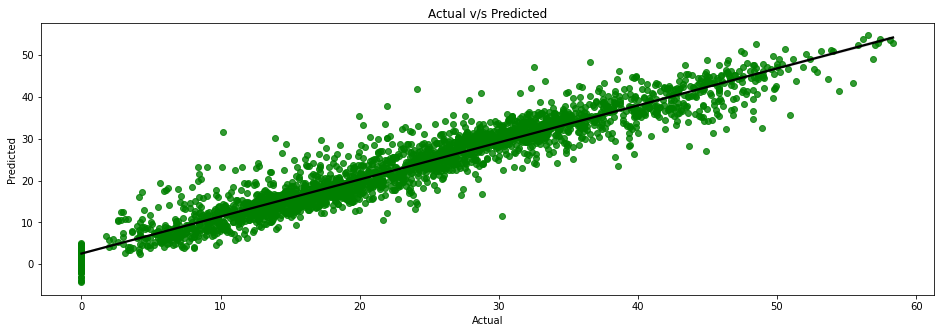

In [996]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_gb_optimal,y_test):
  '''Plot scatter plot for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_gb_optimal,scatter_kws={'color':'g'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_gb_optimal, y_test)

<b> Let's see the important features

Text(0.5, 0, 'Relative Importance')

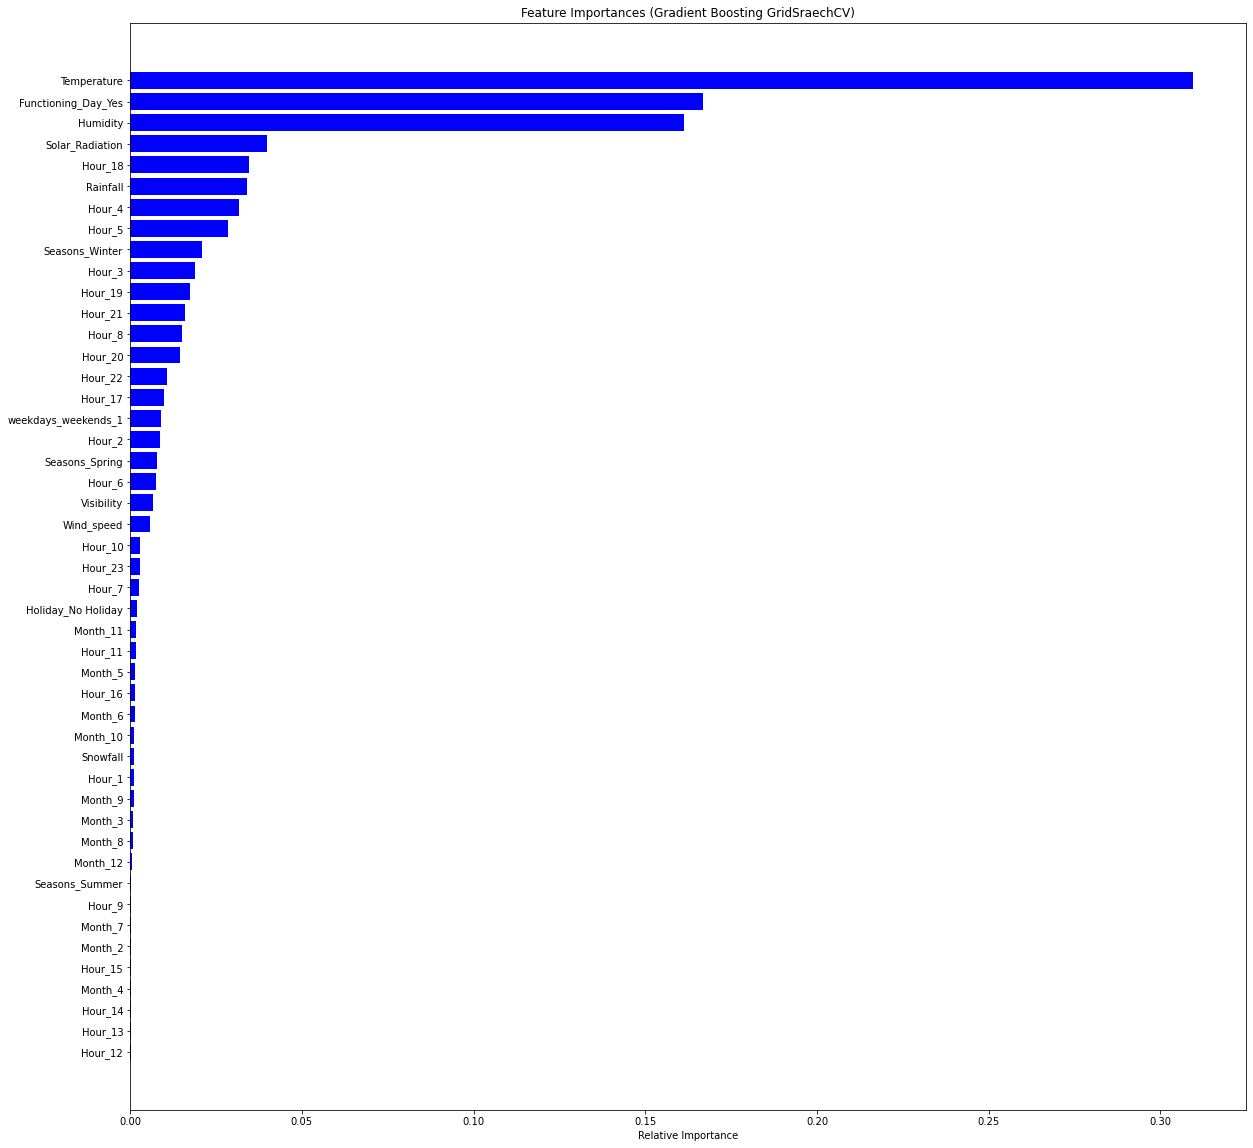

In [1002]:
#Let's check the important variables
imp_variables=X.columns
importances = gb_reg_optimal.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances (Gradient Boosting GridSraechCV)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [998]:
importances = gb_reg_optimal.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [999]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [1000]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
44,Temperature,0.31
17,Functioning_Day_Yes,0.17
4,Humidity,0.16
15,Solar_Radiation,0.04
37,Hour_18,0.03
6,Hour_4,0.03
42,Hour_5,0.03
1,Rainfall,0.03
36,Hour_3,0.02
33,Seasons_Winter,0.02


#**Conclusion**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. 

Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression, Lasso Regression, Ridge Regression, Elasticnet Regression, Decission tree, Random Forest and XGBoost(Gradient Boosting). 

We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [1001]:
#Displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0              Linear regression   4.697  38.094  6.172   
             1               Lasso regression   7.353  93.499  9.669   
             2                Ridge regression  4.697  38.094  6.172   
             3          Elastic net Regression  4.697   4.697  6.172   
             4        Decision Tree Regression  4.927  44.663  6.683   
             5        Random Forest Regression  0.976   2.178  1.476   
             6               Gradient Boosting  3.496  21.453  4.632   
             7       Gradient Boosting optimal  2.271  10.635  3.261   
             8  Gradient Boosting GridSearchCV  2.271  10.635  3.261   
Test set     0              Linear regression   4.697  35.674  6.172   
             1               Lasso regression   7.235  92.032  9.593   
             2                Ridge regression  4.557  35.674  5.973   
             3          Elastic net Regression  4.557  35.672  5.973   
             4        Decision Tree Regression  5.016  48.651  6.975   
             5        Random Forest Regression  2.534  14.377  3.792   
             6               Gradient Boosting  3.580  23.029  4.799   
             7       Gradient Boosting optimal  2.577  13.441  3.666   
             8  Gradient Boosting GridSearchCV  2.577  13.441  3.666   

                R2_score  Adjusted_R2  
Training set 0     0.755        0.750  
             1     0.398        0.390  
             2     0.755        0.750  
             3     0.755        0.750  
             4     0.712        0.707  
             5     0.986        0.986  
             6     0.862        0.859  
             7     0.932        0.930  
             8     0.932        0.930  
Test set     0     0.769        0.770  
             1     0.403        0.390  
             2     0.769        0.760  
             3     0.769        0.764  
             4     0.684        0.679  
             5     0.907        0.905  
             6     0.851        0.848  
             7     0.913        0.911  
             8     0.913        0.911


* ### On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Our model performed well without hyperparameter tuning.


 * ### On Gradient Boosting model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data, After hyperparameter tuning we got r2 score as 93% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.

* ### Thus Gradient Boosting Regression(GridSearchCV) and Random forest Regressor gives good r2 scores. We can deploy this models.


<b> However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.